# Areen work
# We import the data and clean it


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# In total we have 320 rows(participant) but not all of them answer to all the Questions 

In [73]:

# Specify the path to your Excel file
excel_file_path = 'C:/Users/samir/areen_2_excel.xlsx'

df = pd.read_excel(excel_file_path)
num_rows = len(df)
print("Number of rows:", num_rows)


df = pd.read_excel(excel_file_path).dropna()

df.head(10)


Number of rows: 320


Timestamp  Your Age Your Gender  Educational Level   \
0 2024-02-09 21:53:34.676        35       Female    Master's Degree   
1 2024-02-09 21:54:16.854        42       Female  Bachelor's Degree   
2 2024-02-09 21:54:52.752        44         Male    Master's Degree   
3 2024-02-09 21:55:28.994        25         Male    Master's Degree   
4 2024-02-09 21:56:21.355        45         Male    Master's Degree   
5 2024-02-09 21:57:02.655        33       Female  Bachelor's Degree   
6 2024-02-09 22:00:17.486        25       Female  Bachelor's Degree   
7 2024-02-09 22:01:03.705        24       Female  Bachelor's Degree   
8 2024-02-09 22:01:53.768        37         Male  Bachelor's Degree   
9 2024-02-09 22:02:41.057        46       Female  Bachelor's Degree   

   Years of Experience   \
0                    12   
1                    15   
2                    20   
3                     2   
4                    13   
5                    10   
6                     2   
7                     2   
8                     3   
9                    10   

  Are you aware of the potential health benefits of Magnesium supplements?  \
0                                                Yes                         
1                                                Yes                         
2                                                Yes                         
3                                                Yes                         
4                                                 No                         
5                                                Yes                         
6                                                Yes                         
7                                                Yes                         
8                                                Yes                         
9                                                Yes                         

  Where do you get the knowledge about Magnesium benefits ?  \
0                                    Self experience          
1                       Magnesium supplements Labels          
2                                    Self experience          
3                                    Self experience          
4                       More than one answer is true          
5                              Scientific Researches          
6                       More than one answer is true          
7                       Magnesium supplements Labels          
8                                 University courses          
9                                    Self experience          

  What food is highest in magnesium ? What are the signs of low magnesium ?  \
0                      Chicken & Meat                         Muscle spasms   
1                        Whole grains                         Muscle spasms   
2                      Chicken & Meat                               Fatigue   
3                      Chicken & Meat                               Fatigue   
4                        Whole grains                          Mood changes   
5                      Chicken & Meat                               Fatigue   
6                        Whole grains                         Muscle spasms   
7                      Chicken & Meat                               Fatigue   
8                        Whole grains                          Mood changes   
9                      Chicken & Meat                               Fatigue   

  What are the health condition does magnesium used for  ?  ...  \
0                                  Migraine headache        ...   
1      Chronic diseases ( Arrhythmia , diabetes ,..)        ...   
2                                      Muscle cramps        ...   
3                                      Muscle cramps        ...   
4                                      Muscle cramps        ...   
5                                      Muscle cramps        ...   
6                                      Muscl

In [74]:
df.replace(r'^\s*$', None, regex=True, inplace=True)

# Fill None values with NaN
df.fillna(pd.NA, inplace=True)


In [75]:
#Count the number of missing values in each column
missing_counts = df.isna().sum()

# Count the number of "Not Measured" values in each column
not_measured_counts = (df == "Not Measured").sum()

# Sum the missing counts and "Not Measured" counts across all columns
total_missing_count = missing_counts.sum()
total_not_measured_count = not_measured_counts.sum()

# Display the results
print("Total number of missing values in the dataset:", total_missing_count)
print("Total number of 'Not Measured' values in the dataset:", total_not_measured_count)

num_rows = len(df)
print("Number of rows:", num_rows)


Total number of missing values in the dataset: 0
Total number of 'Not Measured' values in the dataset: 0
Number of rows: 316


# after cleaning and removing the empty rows the number dropped to 316 rows(participant) ,We are going to work with these rows(participant)

# Then next we view the columns and their unique values 

In [76]:
print(df.columns)


Index(['Timestamp', 'Your Age', 'Your Gender ', 'Educational Level ',
       'Years of Experience ',
       'Are you aware of the potential health benefits of Magnesium supplements?',
       'Where do you get the knowledge about Magnesium benefits ?',
       'What food is highest in magnesium ?',
       'What are the signs of low magnesium ?',
       'What are the health condition does magnesium used for  ?',
       'Can magnesium maintained body biological clock balanced ?',
       'Does magnesium help with anxiety ?',
       'What is the main health benefit for Magnesium L-threonate ?',
       'To improve sleep and get rid of insomnia , What is the best type of magnesium you will counsel ?',
       'Magnesium oxide is best indicated for ?',
       'Are you aware about Magnesium supplements toxicity ?\n',
       'What is the recommended dose of Magnesium supplements that patient needs ?',
       'If patient was given doxycyclin for acne treatment and he use Magnesium regularly , What 

In [77]:
columns_to_check = ['Educational Level ', 
                    'Are you aware of the potential health benefits of Magnesium supplements?',
                   'Where do you get the knowledge about Magnesium benefits ?',
                   'What food is highest in magnesium ?',
                   'What are the signs of low magnesium ?',
                   'What are the health condition does magnesium used for  ?',
                   'Can magnesium maintained body biological clock balanced ?',
                   'Does magnesium help with anxiety ?',
                   'What is the main health benefit for Magnesium L-threonate ?',
                   'To improve sleep and get rid of insomnia , What is the best type of magnesium you will counsel ?',
                   'Magnesium oxide is best indicated for ?',
                   'Are you aware about Magnesium supplements toxicity ?\n',
                   'What is the recommended dose of Magnesium supplements that patient needs ?',
                   'If patient was given doxycyclin for acne treatment and he use Magnesium regularly , What is the best plan to do ?',
                   'Which case does Magnesium taken with caution and the dose should be adjusted ?',
                   'Can Large doses of vitamin D induce severe depletion of Mg ?',
                   'Is Magnesium safe for pregnant in Eclampsia cases ?',
                   'What is the side effect behind consuming Magnesium supplements for long term ?',
                   'Why do you think the reasons behind side effects of using Magnesium ?',
                   'Do you recommend others by using Magnesium Supplement regularly ? ']

for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"Unique values for '{column}': {unique_values}")


Unique values for 'Educational Level ': ["Master's Degree" "Bachelor's Degree" 'PHD degree']
Unique values for 'Are you aware of the potential health benefits of Magnesium supplements?': ['Yes' 'No']
Unique values for 'Where do you get the knowledge about Magnesium benefits ?': ['Self experience' 'Magnesium supplements Labels'
 'More than one answer is true' 'Scientific Researches'
 'University courses']
Unique values for 'What food is highest in magnesium ?': ['Chicken & Meat' 'Whole grains' 'Sea Food']
Unique values for 'What are the signs of low magnesium ?': ['Muscle spasms' 'Fatigue' 'Mood changes' 'Insomnia' 'All of above']
Unique values for 'What are the health condition does magnesium used for  ?': ['Migraine headache' 'Chronic diseases ( Arrhythmia , diabetes ,..)'
 'Muscle cramps' 'All of above' 'Power and energy']
Unique values for 'Can magnesium maintained body biological clock balanced ?': [False  True]
Unique values for 'Does magnesium help with anxiety ?': ['No' 'Yes']
U

# To work with the data we have to change it to a boolean form (True or False) beacease the Questions has answer (Correct Value)

In [78]:
dc_df = pd.get_dummies(df , columns = [ 'Your Gender ', 'Educational Level ',
       'Are you aware of the potential health benefits of Magnesium supplements?',
       'Where do you get the knowledge about Magnesium benefits ?',
       'What food is highest in magnesium ?',
       'What are the signs of low magnesium ?',
       'What are the health condition does magnesium used for  ?',
       'Can magnesium maintained body biological clock balanced ?',
       'Does magnesium help with anxiety ?',
       'What is the main health benefit for Magnesium L-threonate ?',
       'To improve sleep and get rid of insomnia , What is the best type of magnesium you will counsel ?',
       'Magnesium oxide is best indicated for ?',
       'Are you aware about Magnesium supplements toxicity ?\n',
       'What is the recommended dose of Magnesium supplements that patient needs ?',
       'If patient was given doxycyclin for acne treatment and he use Magnesium regularly , What is the best plan to do ?',
       'Which case does Magnesium taken with caution and the dose should be adjusted ?',
       'Can Large doses of vitamin D induce severe depletion of Mg ?',
       'Is Magnesium safe for pregnant in Eclampsia cases ?',
       'What is the side effect behind consuming Magnesium supplements for long term ?',
       'Why do you think the reasons behind side effects of using Magnesium ?',
       'Do you recommend others by using Magnesium Supplement regularly ? '])
dc_df.head(10)

Timestamp  Your Age  Years of Experience   \
0 2024-02-09 21:53:34.676        35                    12   
1 2024-02-09 21:54:16.854        42                    15   
2 2024-02-09 21:54:52.752        44                    20   
3 2024-02-09 21:55:28.994        25                     2   
4 2024-02-09 21:56:21.355        45                    13   
5 2024-02-09 21:57:02.655        33                    10   
6 2024-02-09 22:00:17.486        25                     2   
7 2024-02-09 22:01:03.705        24                     2   
8 2024-02-09 22:01:53.768        37                     3   
9 2024-02-09 22:02:41.057        46                    10   

   Your Gender _Female  Your Gender _Male  \
0                 True              False   
1                 True              False   
2                False               True   
3                False               True   
4                False               True   
5                 True              False   
6                 True              False   
7                 True              False   
8                False               True   
9                 True              False   

   Educational Level _Bachelor's Degree  Educational Level _Master's Degree  \
0                                 False                                True   
1                                  True                               False   
2                                 False                                True   
3                                 False                                True   
4                                 False                                True   
5                                  True                               False   
6                                  True                               False   
7                                  True                               False   
8                                  True                               False   
9                                  True                               False   

   Educational Level _PHD degree  \
0                          False   
1                          False   
2                          False   
3                          False   
4                          False   
5                          False   
6                          False   
7                          False   
8                          False   
9                          False   

   Are you aware of the potential health benefits of Magnesium supplements?_No  \
0                                              False                             
1                                              False                             
2                                              False                             
3                                              False                             
4                                               True                             
5                                              False                             
6                                              False                             
7                                              False                             
8                                              False                             
9                                              False                             

   Are you aware of the potential health benefits of Magnesium supplements?_Yes  \
0                                               True                              
1                                               True                              
2                                               True                              
3                                               True                              
4                                              False                              
5                                               True                              
6                                               True                              
7             

In [79]:
dc_df.dtypes


Timestamp                                                                                                         datetime64[ns]
Your Age                                                                                                                   int64
Years of Experience                                                                                                        int64
Your Gender _Female                                                                                                         bool
Your Gender _Male                                                                                                           bool
                                                                                                                       ...      
Why do you think the reasons behind side effects of using Magnesium ?_Lack of sufficient knowledge                          bool
Why do you think the reasons behind side effects of using Magnesium ?_Misuse of Magnesium ( impro

In [80]:
# Assuming your DataFrame is named df_new and you want to save it to a file named 'new_data.xlsx'
#dc_df.to_excel('new_data1.xlsx', index=False)


# small describtion about the Age and Years of Experience

In [81]:
dc_df.describe()



Timestamp    Your Age  Years of Experience 
count                            316  316.000000            316.000000
mean   2024-02-21 00:45:27.498607872   34.268987             10.566456
min       2024-02-09 21:53:34.676000   22.000000              1.000000
25%    2024-02-10 17:49:49.080999936   28.000000              5.000000
50%    2024-02-12 21:36:15.685999872   31.000000              8.000000
75%    2024-03-03 17:09:38.880750080   40.000000             15.000000
max       2024-03-08 19:48:43.180000   60.000000             32.000000
std                              NaN    8.537896              7.354861

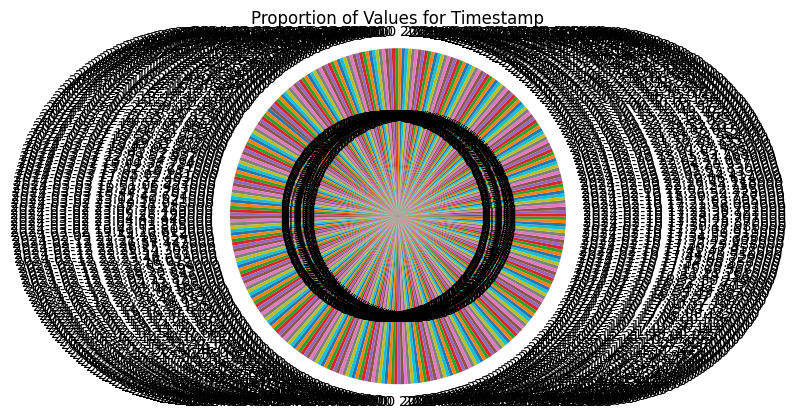

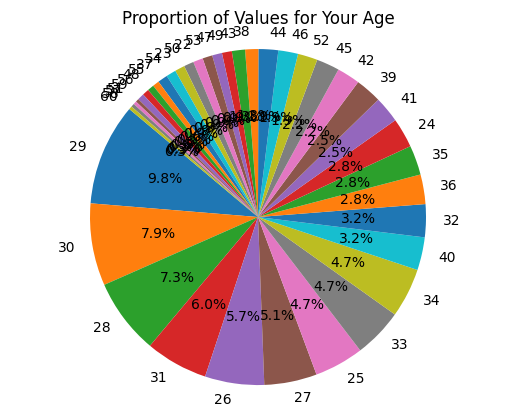

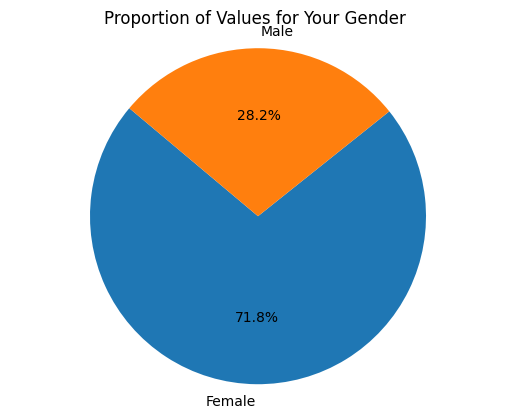

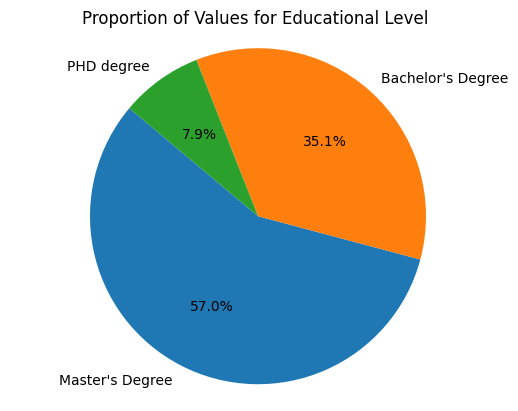

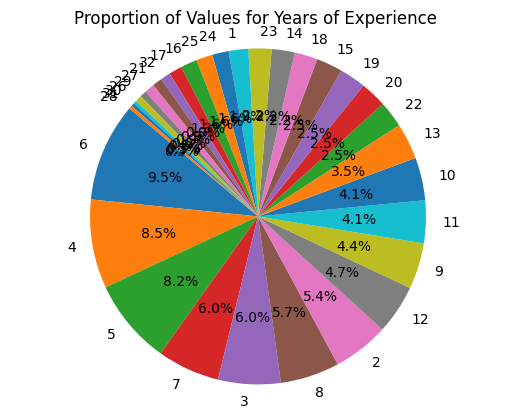

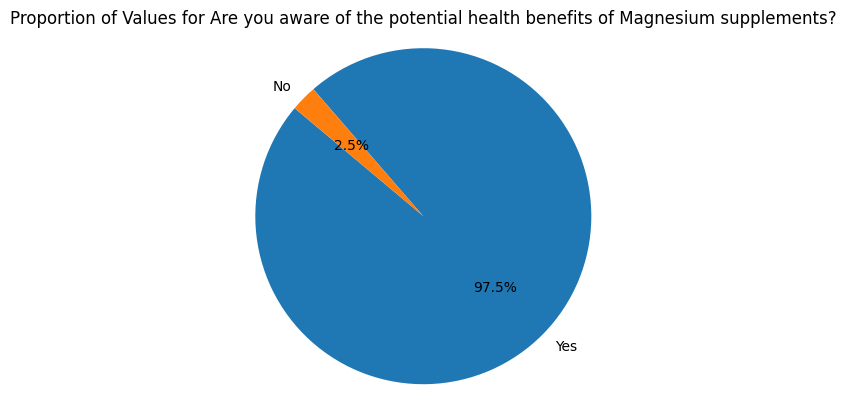

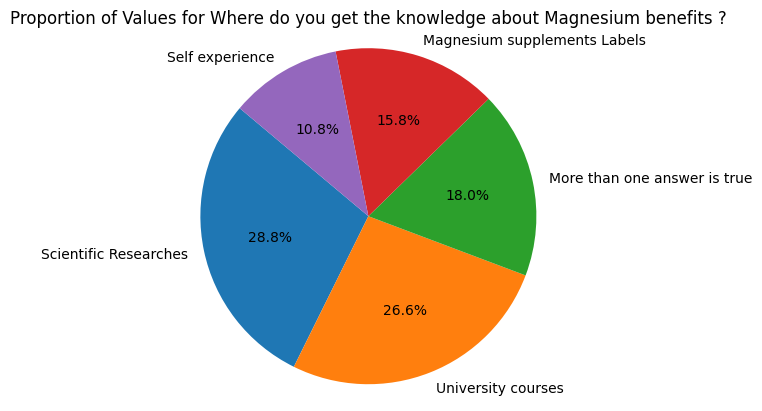

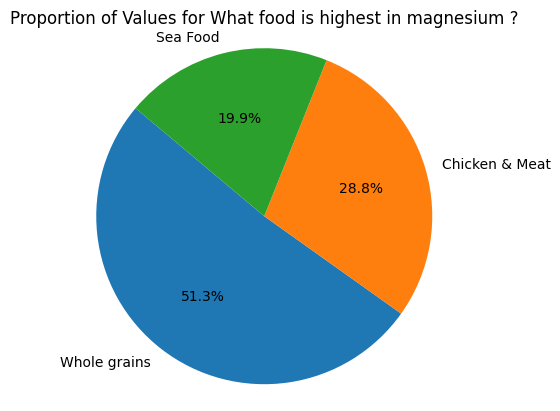

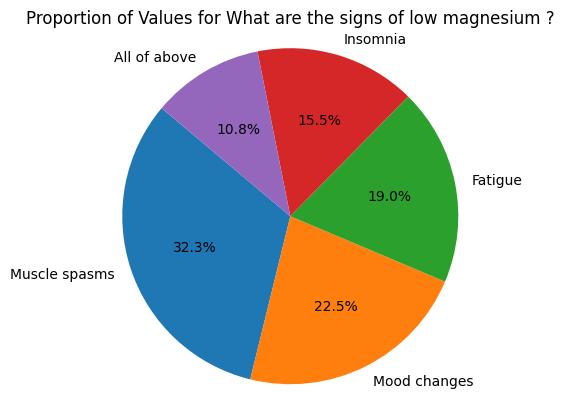

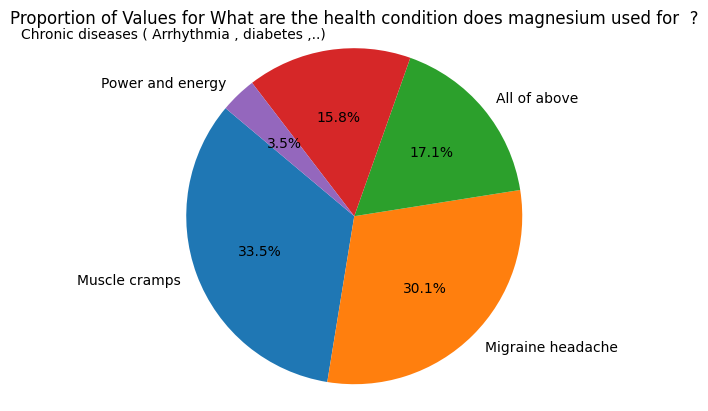

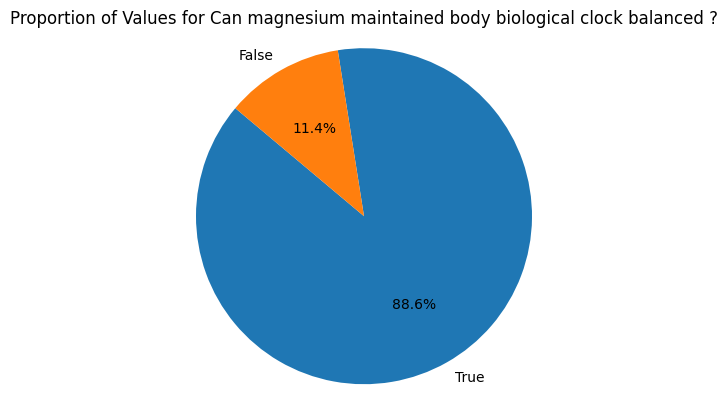

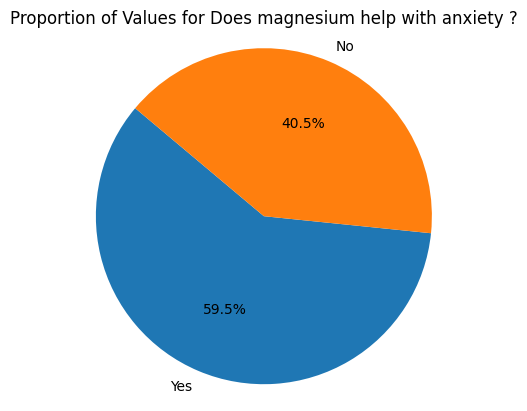

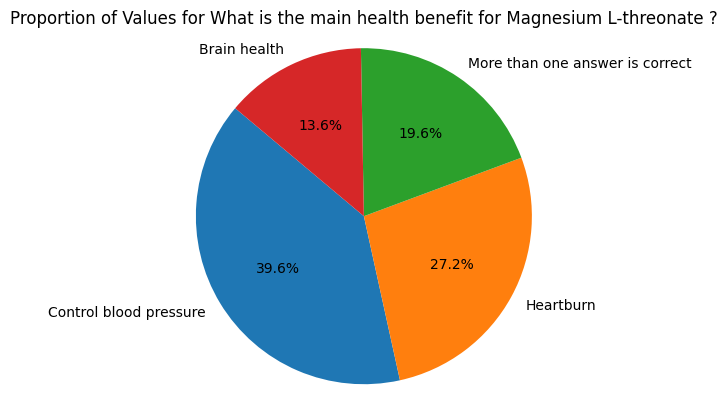

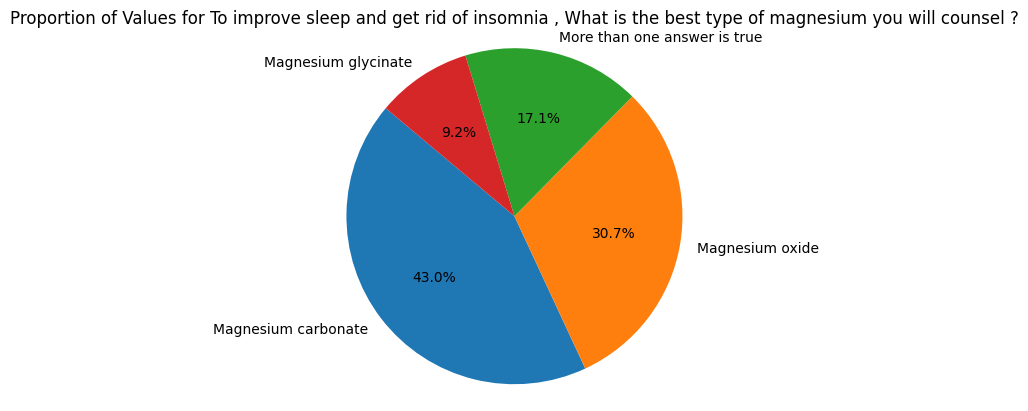

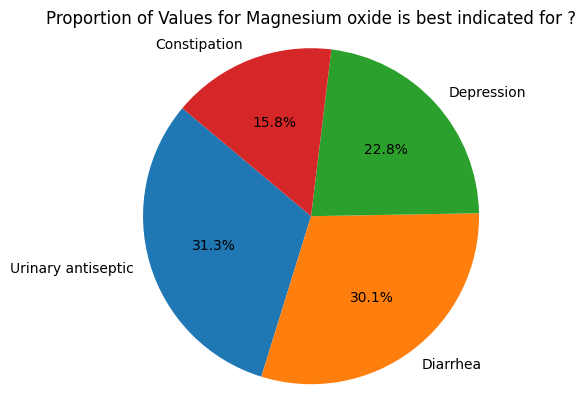

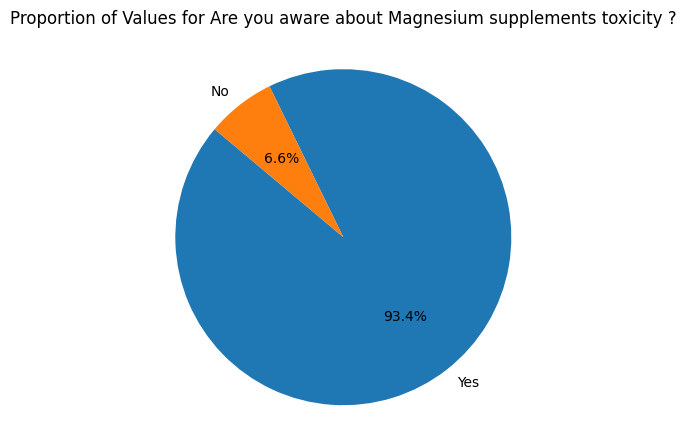

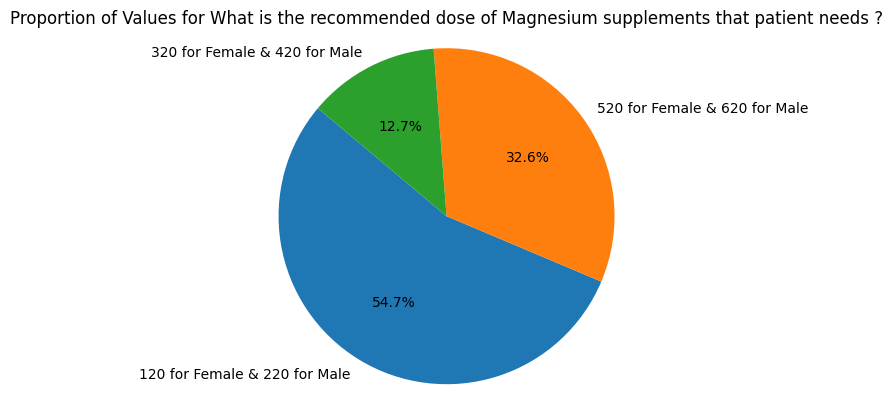

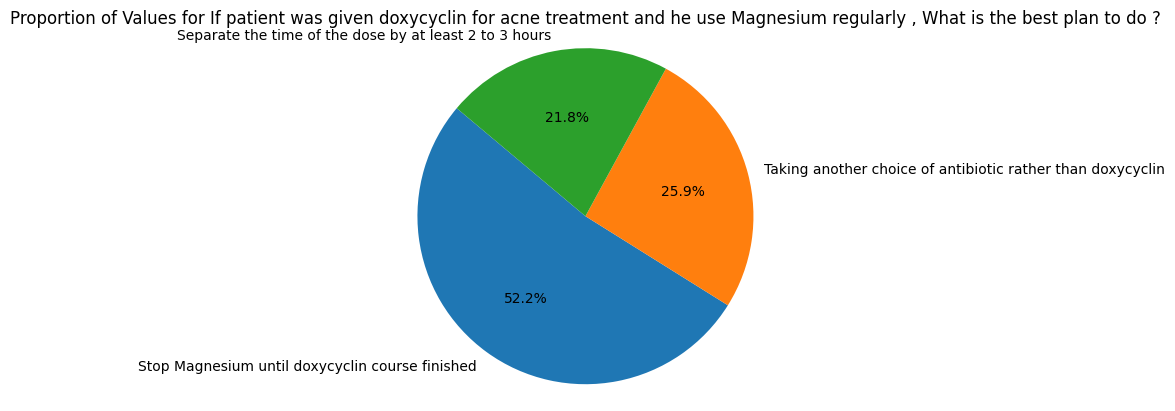

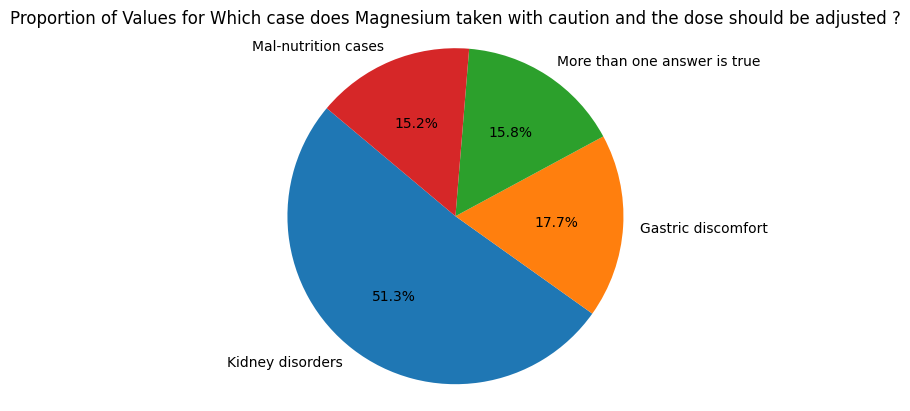

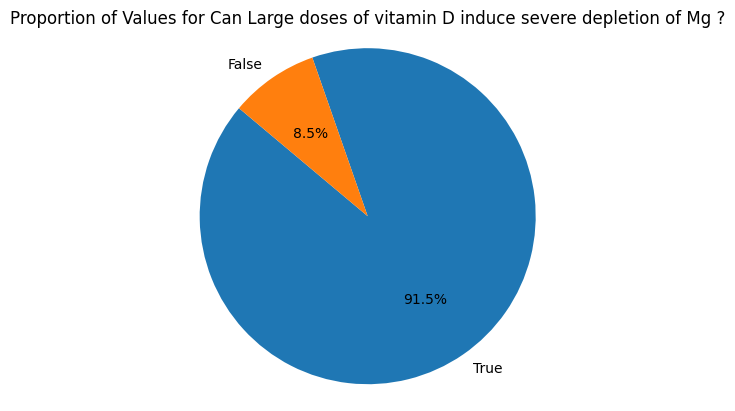

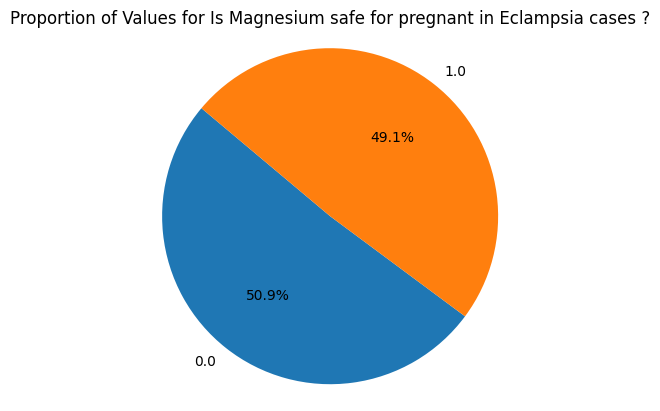

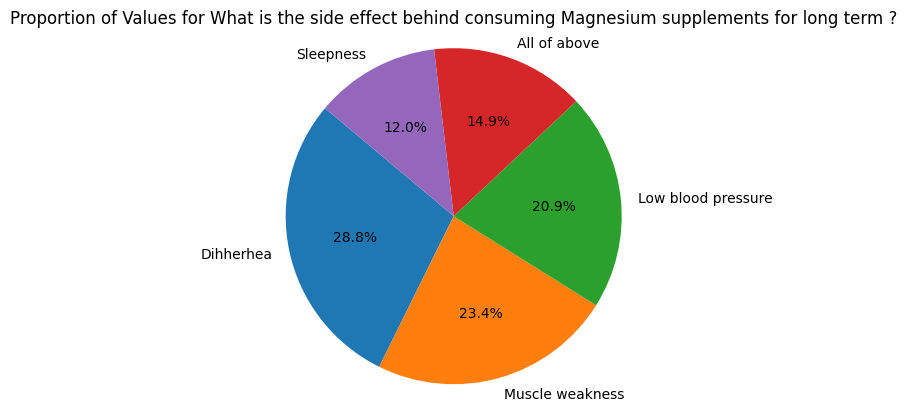

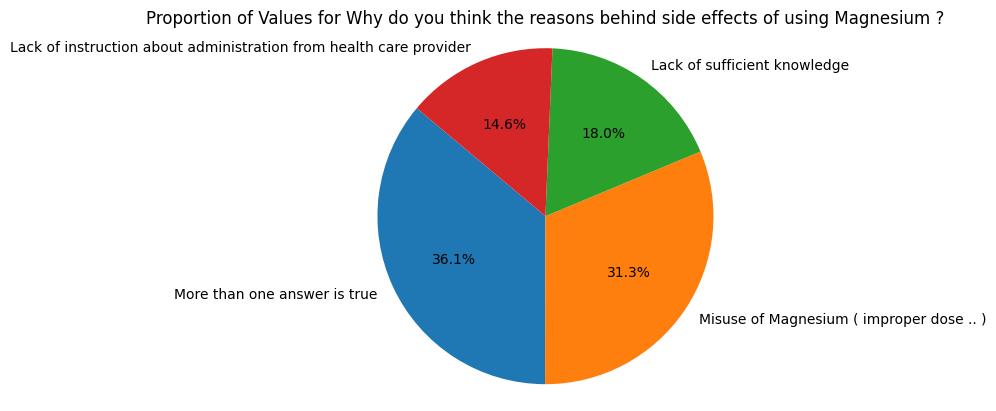

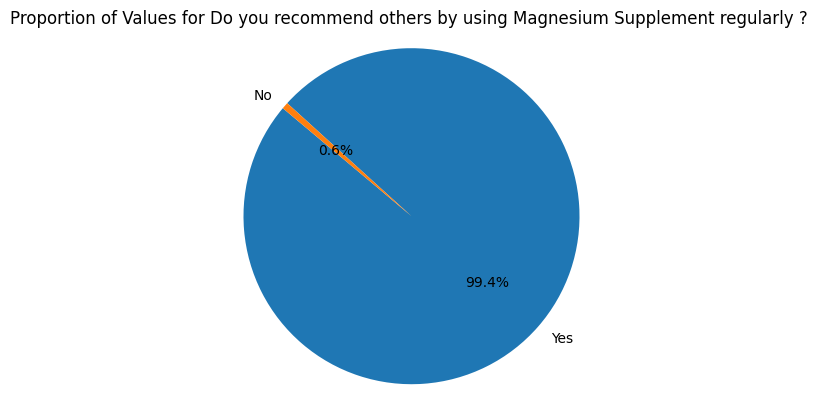

In [82]:
# Iterate over each column and plot a pie chart
for column in df.columns:
    try:
        plt.figure()
        counts = df[column].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Proportion of Values for {column}')
        plt.axis('equal')
        plt.show()
    except Exception as e:
        print(f"Error plotting pie chart for column '{column}': {e}")


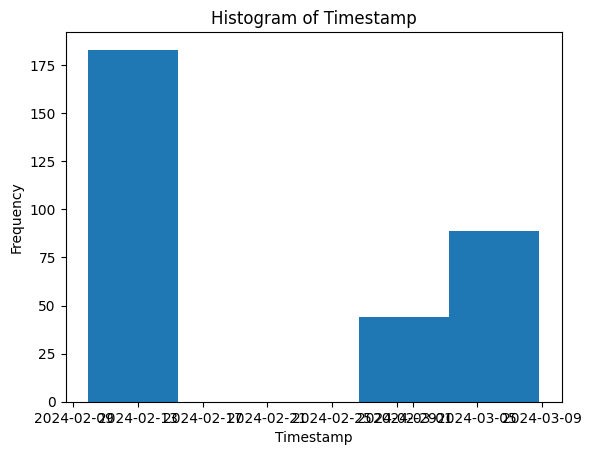

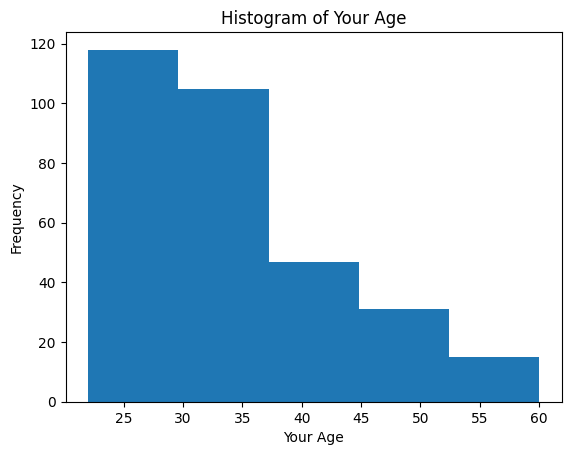

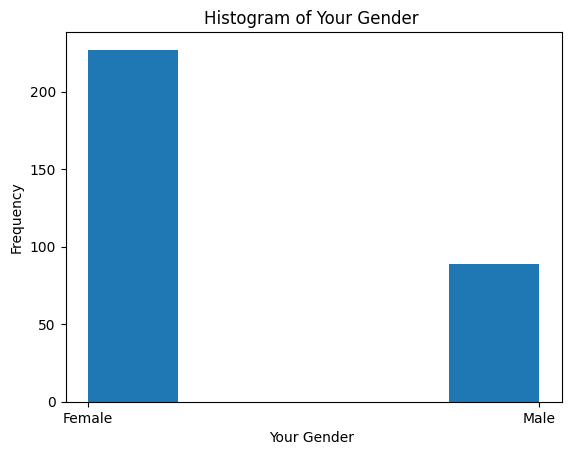

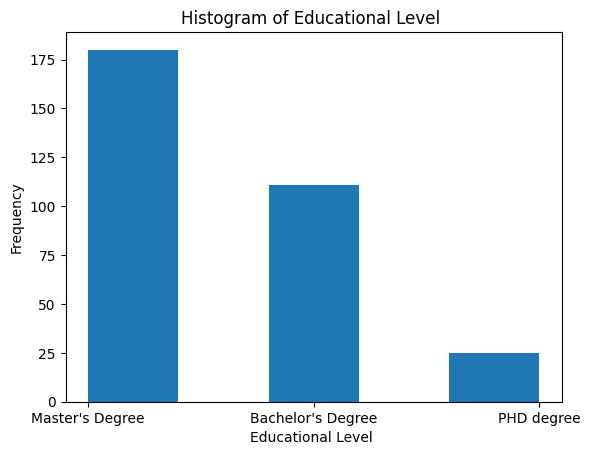

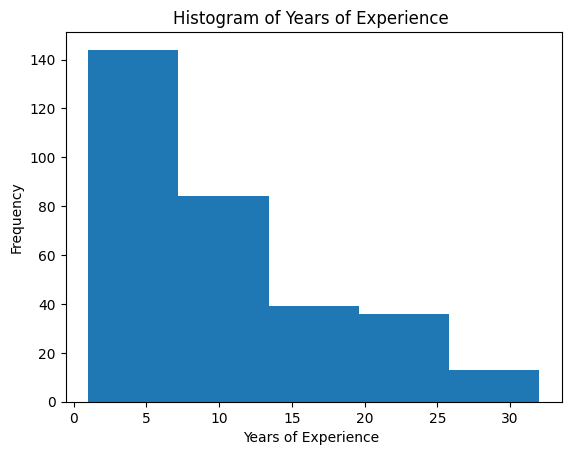

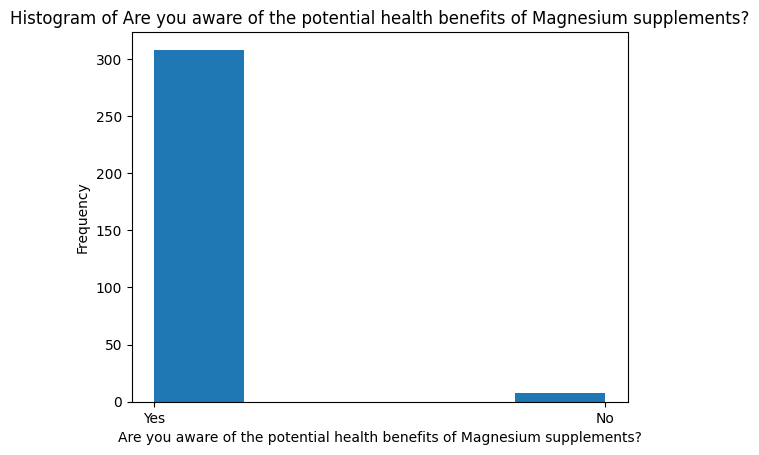

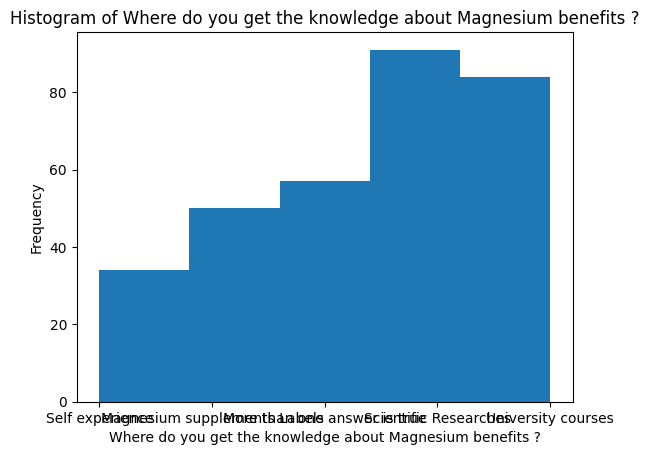

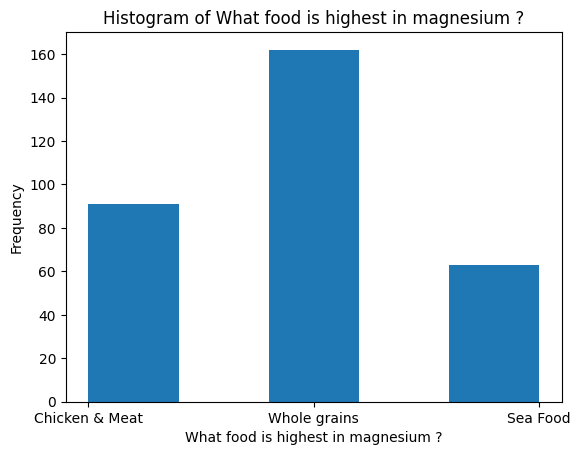

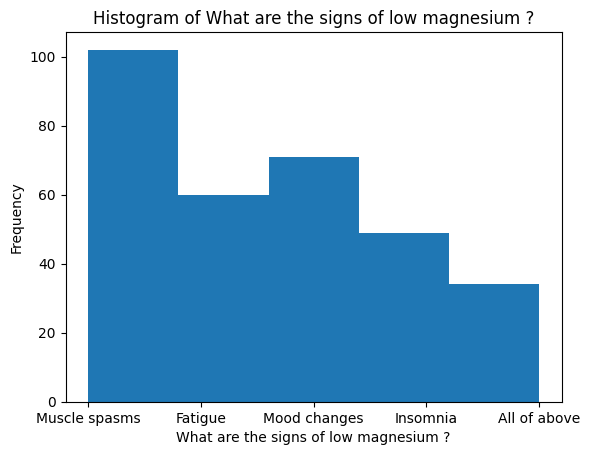

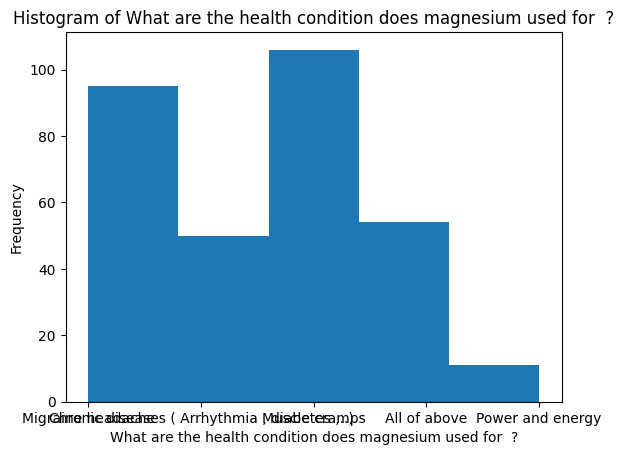

Error plotting histogram for column 'Can magnesium maintained body biological clock balanced ?': numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


C:\Users\samir\miniconda3\Lib\site-packages\matplotlib\axes\_axes.py:6859: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


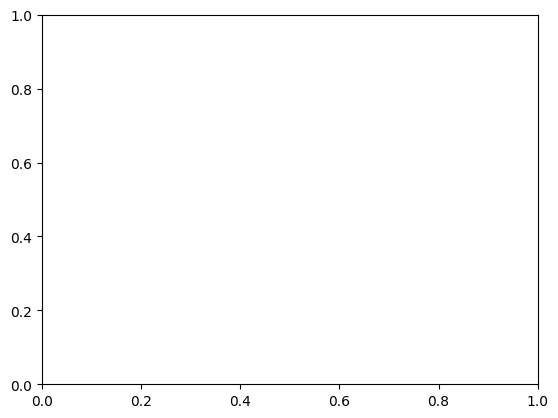

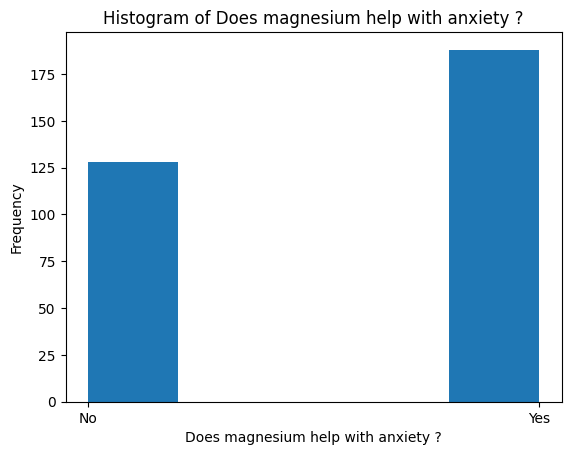

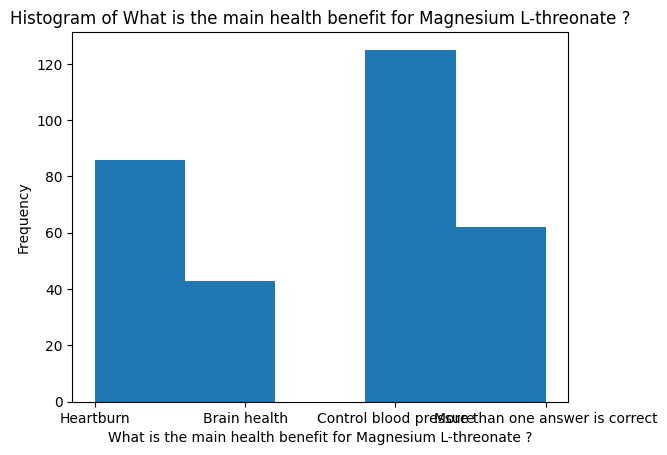

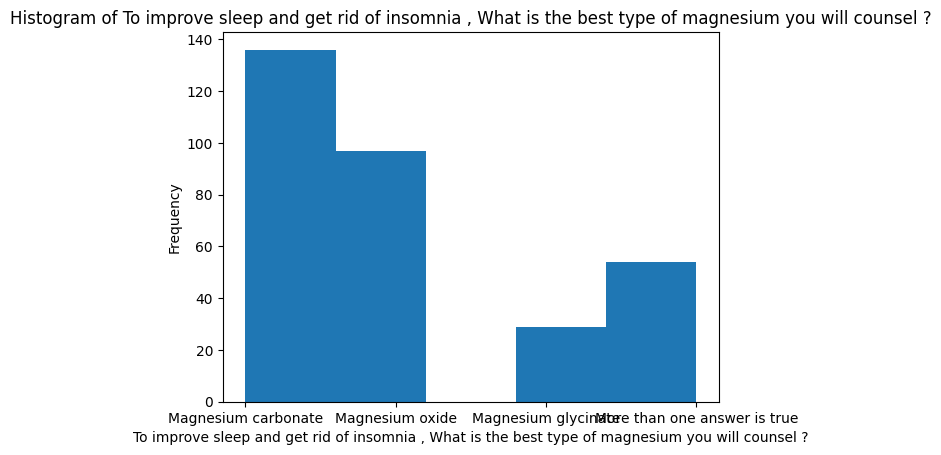

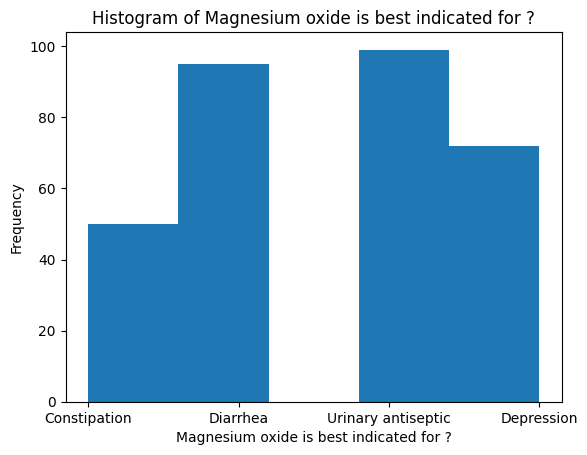

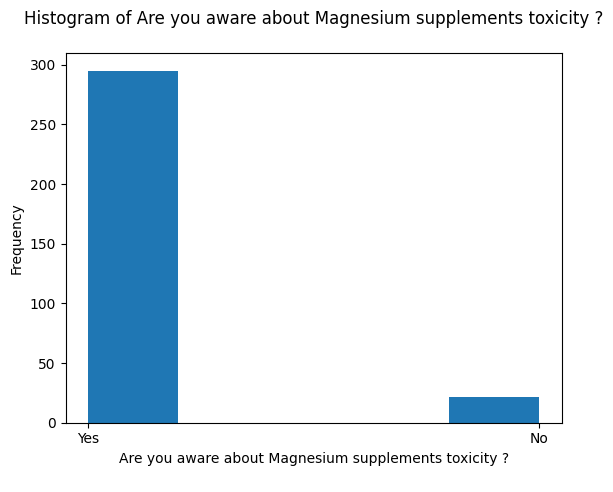

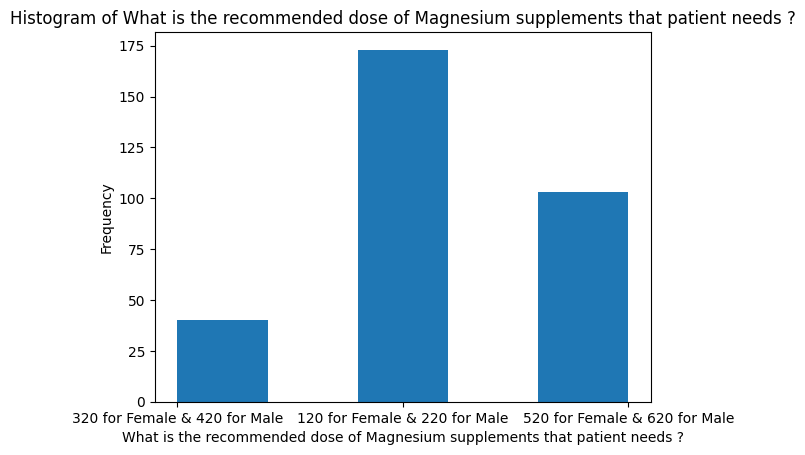

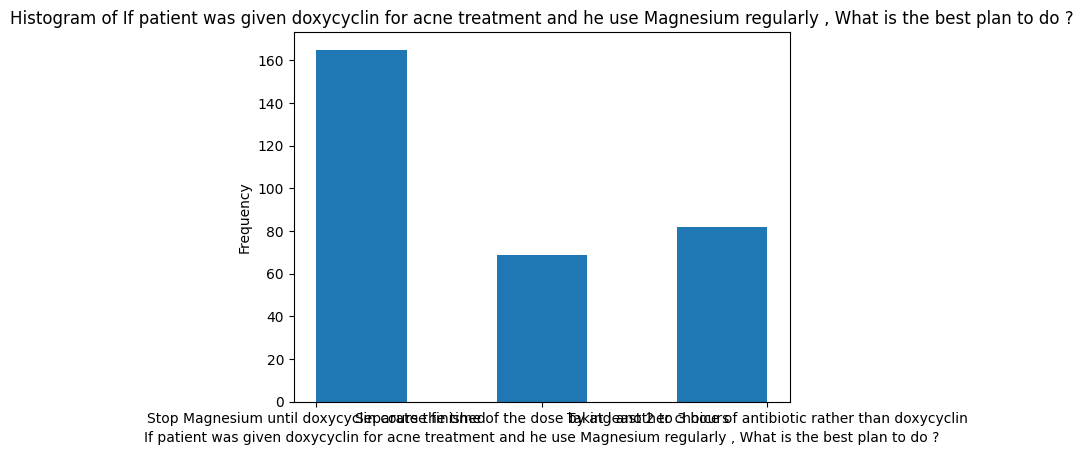

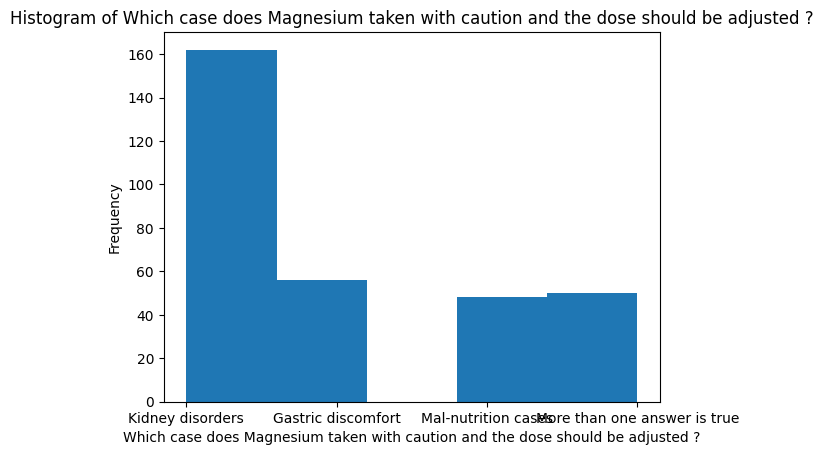

Error plotting histogram for column 'Can Large doses of vitamin D induce severe depletion of Mg ?': numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


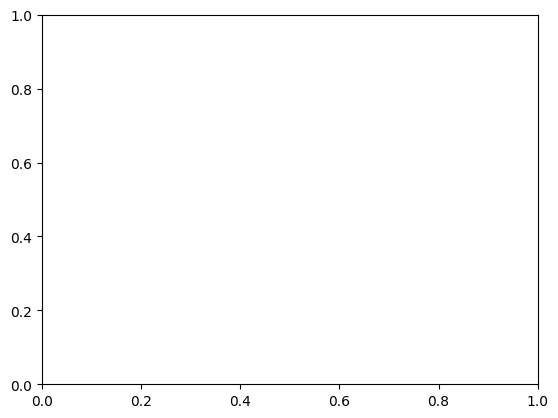

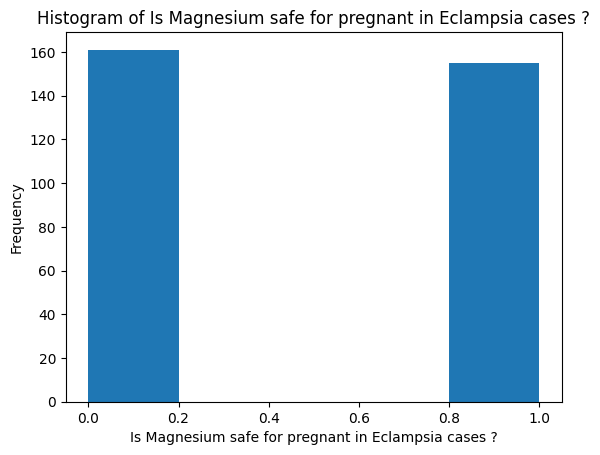

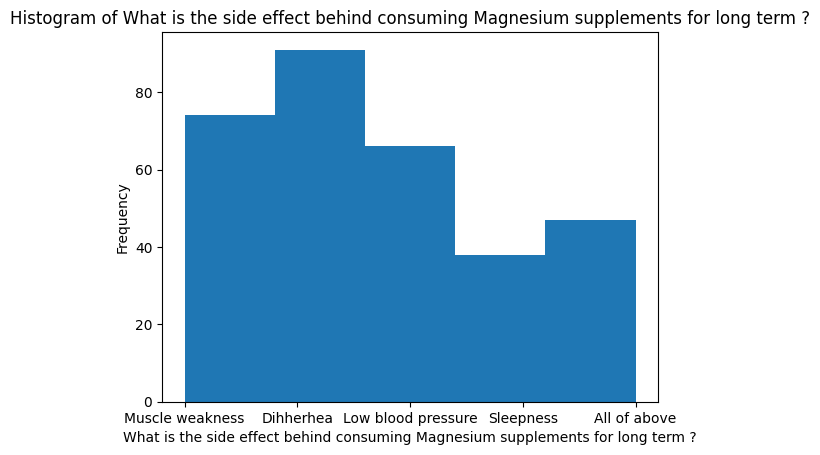

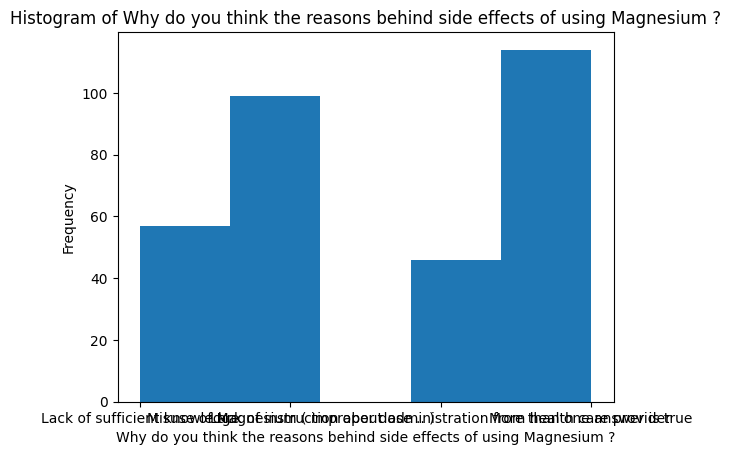

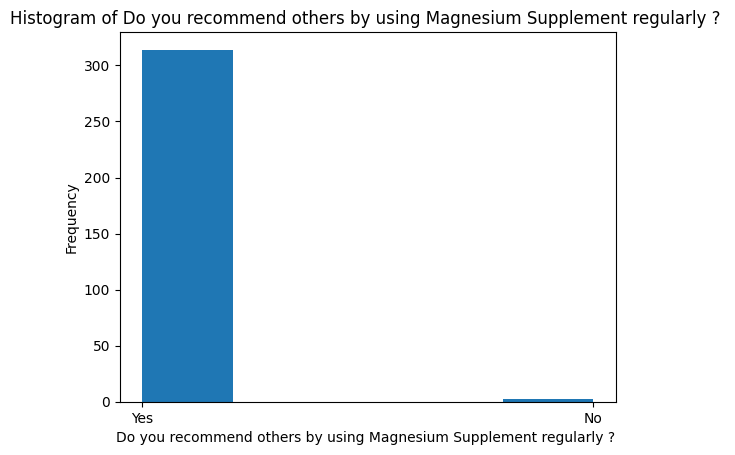

In [83]:
# Iterate over each column and plot a histogram
for column in df.columns:
    try:
        plt.figure()
        plt.hist(df[column], bins=5)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')
        plt.show()
    except Exception as e:
        print(f"Error plotting histogram for column '{column}': {e}")



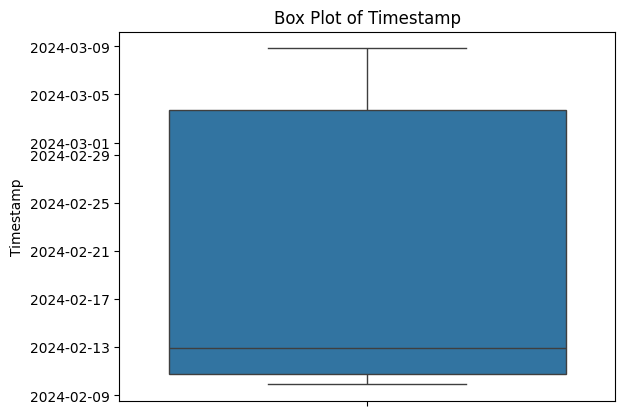

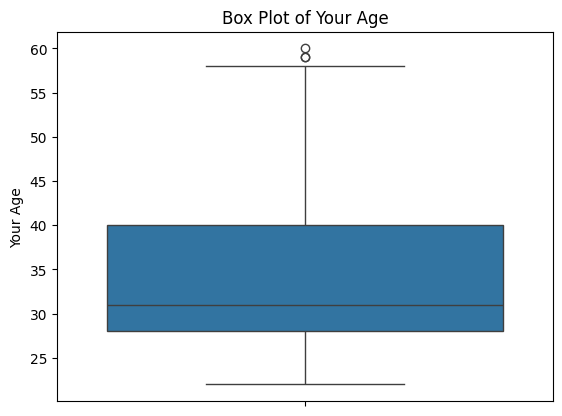

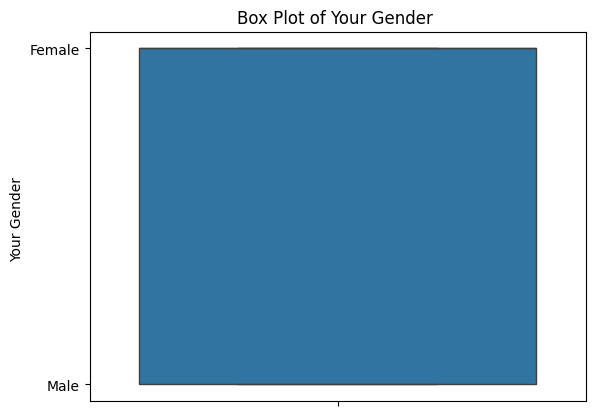

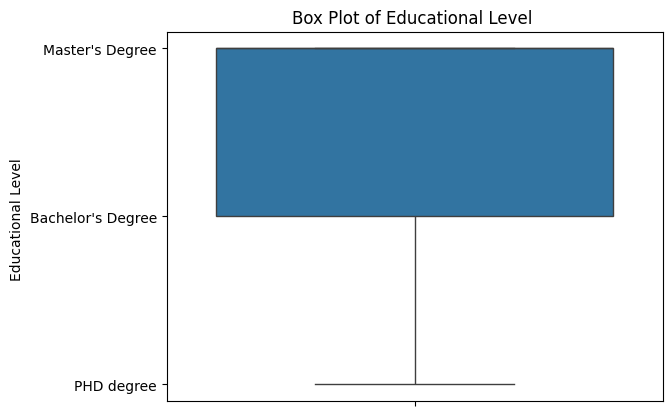

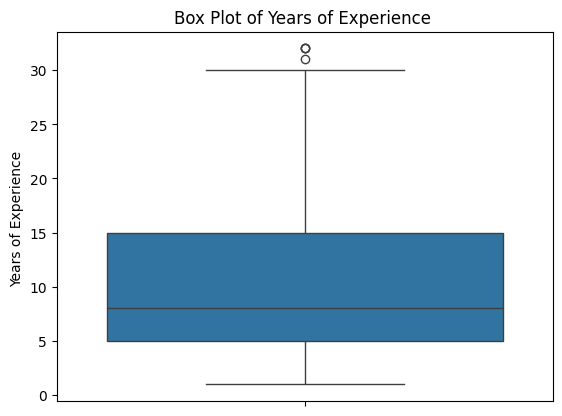

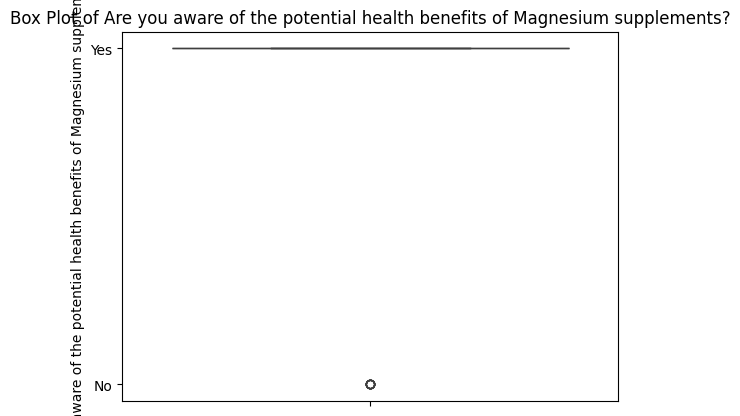

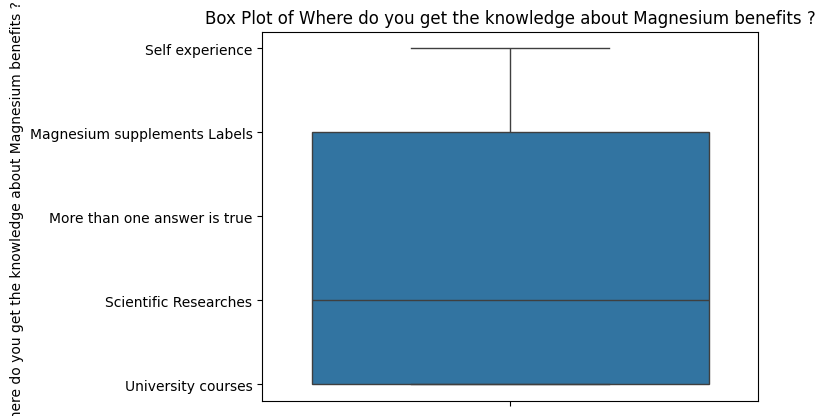

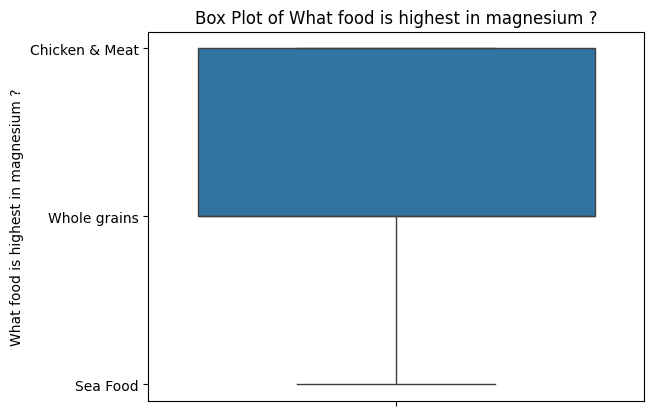

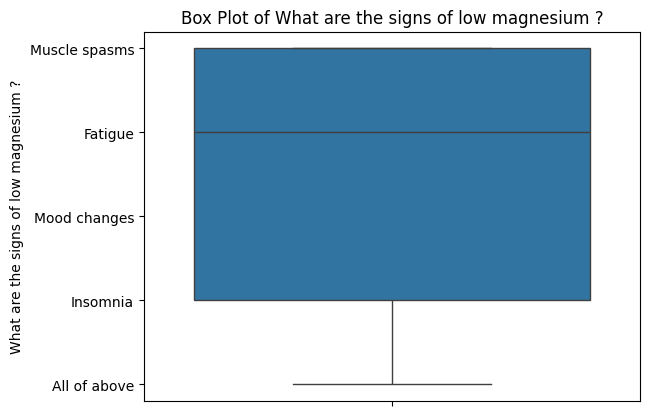

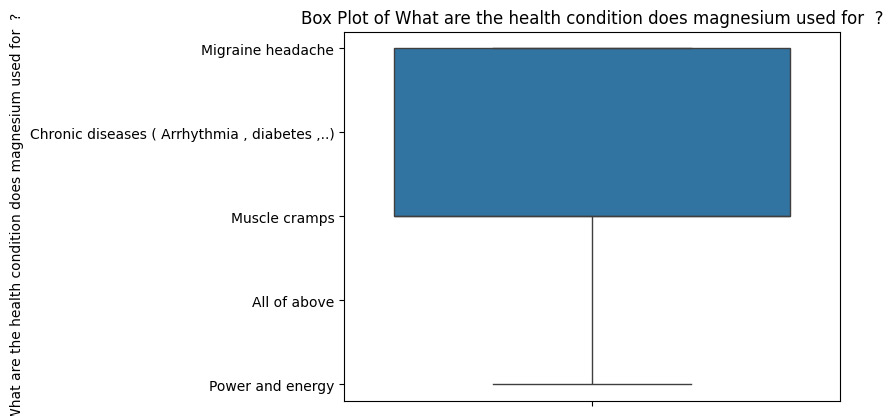

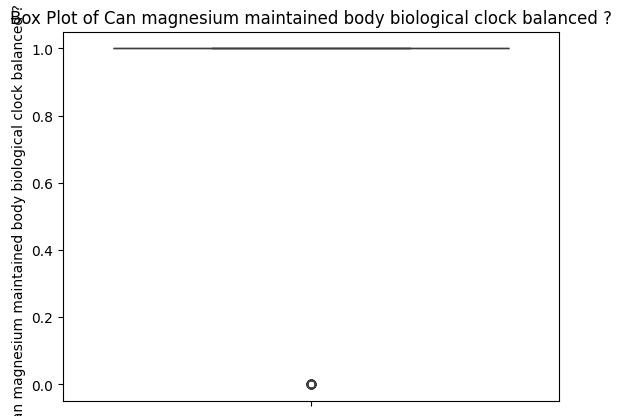

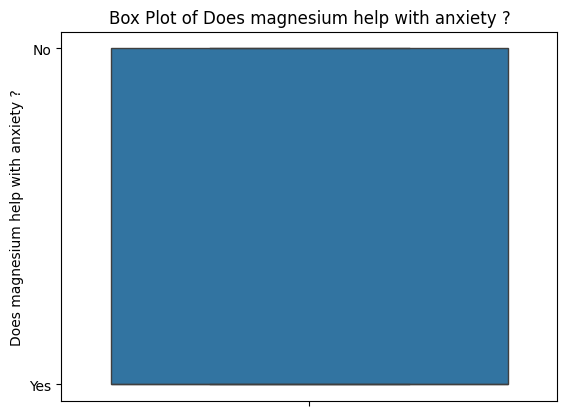

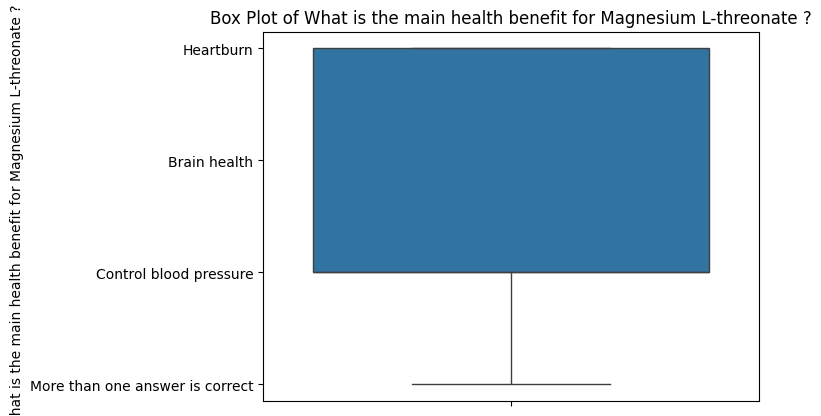

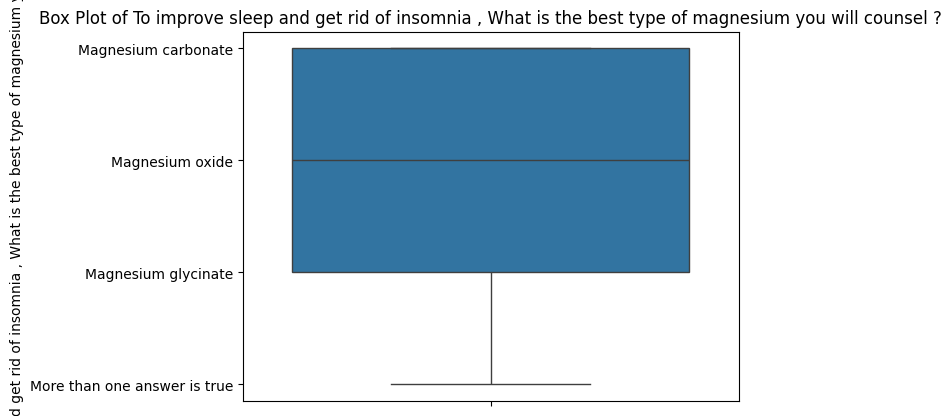

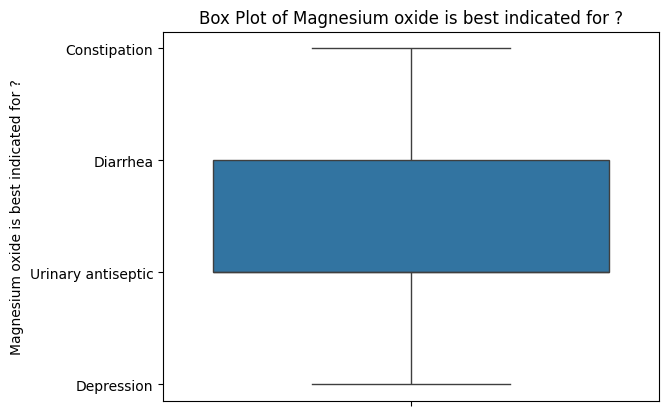

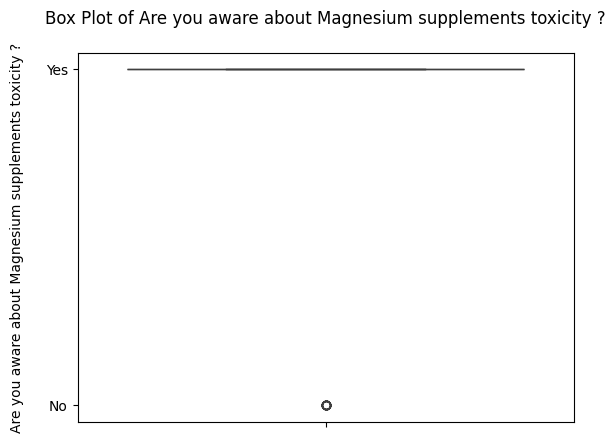

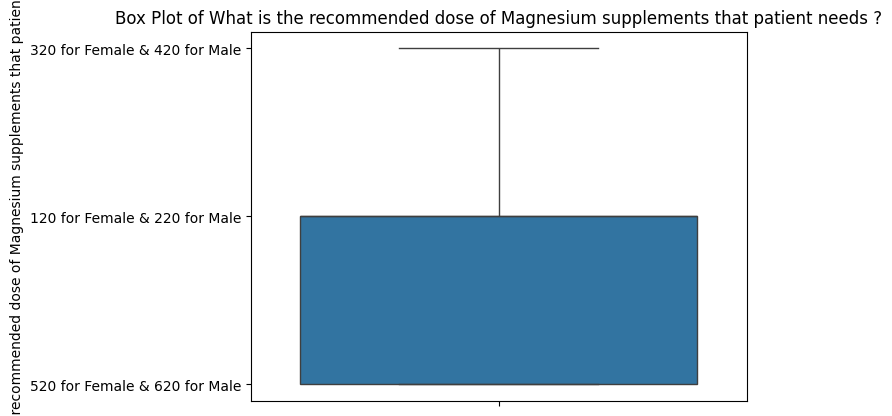

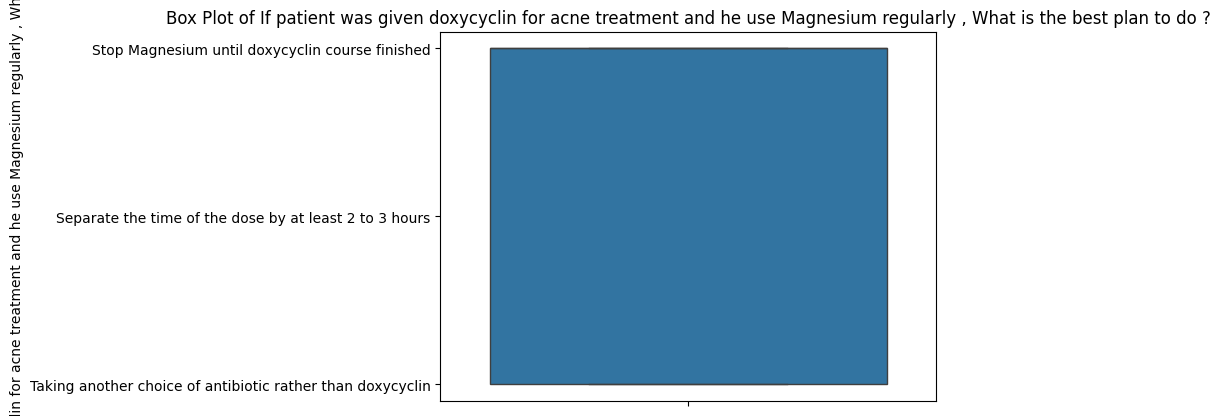

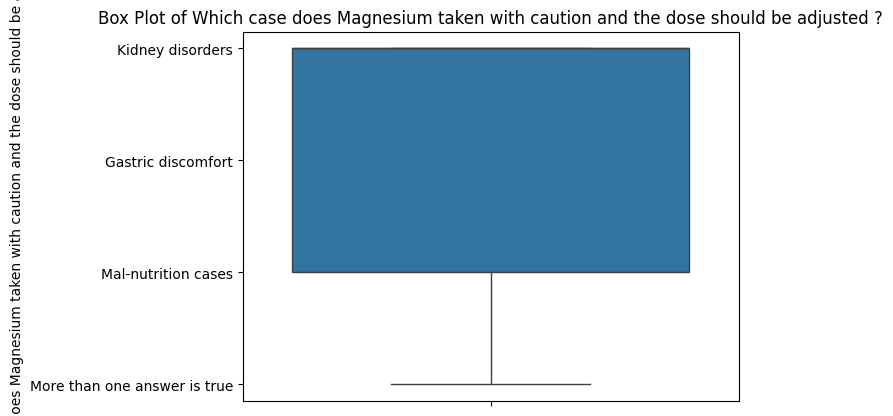

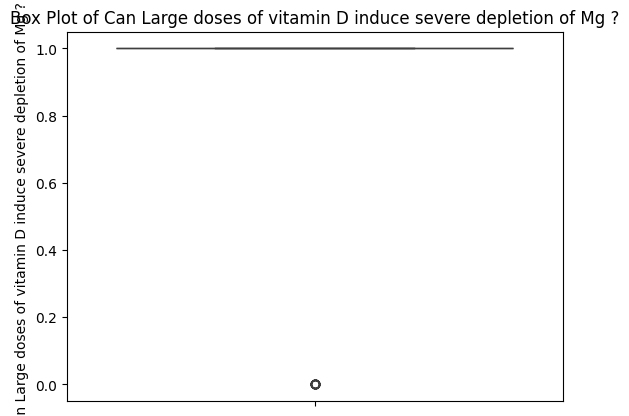

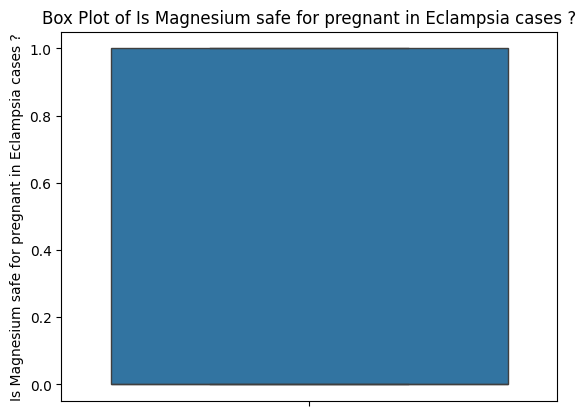

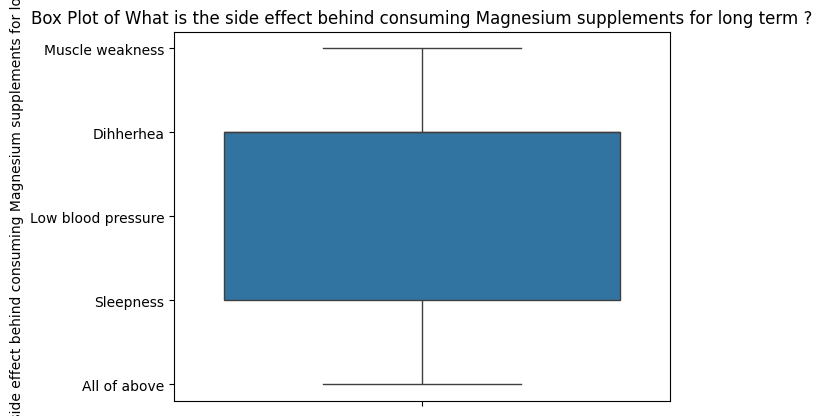

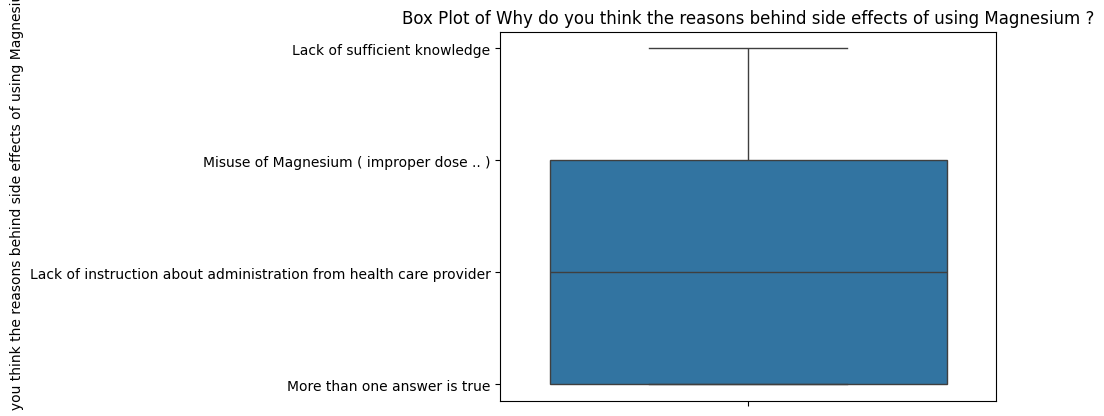

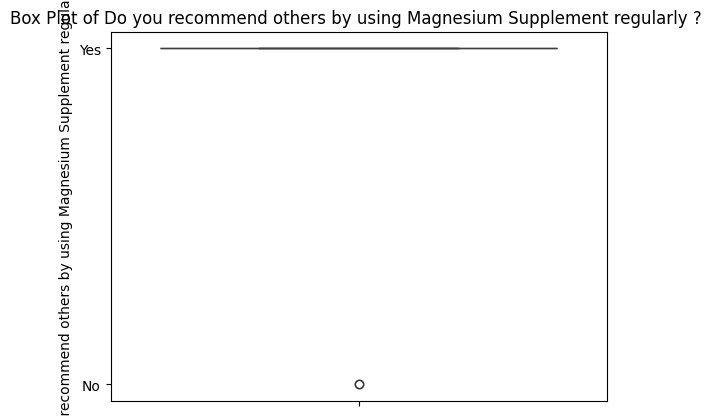

In [84]:
# Iterate over each column and plot a box plot
for column in df.columns:
    plt.figure()
    sns.boxplot(data=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [85]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                                                    Your Age  \
Your Age                                            1.000000   
Years of Experience                                 0.924087   
Is Magnesium safe for pregnant in Eclampsia cas...  0.038843   

                                                    Years of Experience   \
Your Age                                                        0.924087   
Years of Experience                                             1.000000   
Is Magnesium safe for pregnant in Eclampsia cas...             -0.005000   

                                                    Is Magnesium safe for pregnant in Eclampsia cases ?  
Your Age                                                                                     0.038843    
Years of Experience                                                                         -0.005000    
Is Magnesium safe for pregnant in Eclampsia cas...                                           1.000000    


In [86]:
print(dc_df.columns)


Index(['Timestamp', 'Your Age', 'Years of Experience ', 'Your Gender _Female',
       'Your Gender _Male', 'Educational Level _Bachelor's Degree',
       'Educational Level _Master's Degree', 'Educational Level _PHD degree',
       'Are you aware of the potential health benefits of Magnesium supplements?_No',
       'Are you aware of the potential health benefits of Magnesium supplements?_Yes',
       'Where do you get the knowledge about Magnesium benefits ?_Magnesium supplements Labels',
       'Where do you get the knowledge about Magnesium benefits ?_More than one answer is true',
       'Where do you get the knowledge about Magnesium benefits ?_Scientific Researches',
       'Where do you get the knowledge about Magnesium benefits ?_Self experience',
       'Where do you get the knowledge about Magnesium benefits ?_University courses',
       'What food is highest in magnesium ?_Chicken & Meat',
       'What food is highest in magnesium ?_Sea Food',
       'What food is highest in

# The P value calulated for all questions and age column

In [87]:
columns_to_iterate = dc_df.columns[3:]
for column in columns_to_iterate:
    group1 = dc_df[dc_df[column]]['Your Age']
    group2 = dc_df[~dc_df[column]]['Your Age']
    t_statistic, p_value = stats.ttest_ind(group1, group2)
    print(f"\n{column},Age")
    print(f"\nT-statistic: {t_statistic}, p-value: {p_value}")



Your Gender _Female,Age

T-statistic: -0.8354282315663758, p-value: 0.4041118601134909

Your Gender _Male,Age

T-statistic: 0.8354282315663758, p-value: 0.4041118601134909

Educational Level _Bachelor's Degree,Age

T-statistic: -2.9025457697763497, p-value: 0.003963340794291541

Educational Level _Master's Degree,Age

T-statistic: 0.5926544370281476, p-value: 0.5538389985194547

Educational Level _PHD degree,Age

T-statistic: 4.0835944306622025, p-value: 5.6327797470779135e-05

Are you aware of the potential health benefits of Magnesium supplements?_No,Age

T-statistic: 1.676192371049795, p-value: 0.0946958437804924

Are you aware of the potential health benefits of Magnesium supplements?_Yes,Age

T-statistic: -1.676192371049795, p-value: 0.0946958437804924

Where do you get the knowledge about Magnesium benefits ?_Magnesium supplements Labels,Age

T-statistic: 0.22624418421987122, p-value: 0.8211587089068493

Where do you get the knowledge about Magnesium benefits ?_More than one ans

# The P value calulated for all questions and Years of Experience column

In [88]:
columns_to_iterate = dc_df.columns[3:]
for column in columns_to_iterate:
    group1 = dc_df[dc_df[column]]['Years of Experience ']
    group2 = dc_df[~dc_df[column]]['Years of Experience ']
    t_statistic, p_value = stats.ttest_ind(group1, group2)
    print(f"\n{column},years of experience")
    print(f"\nT-statistic: {t_statistic}, p-value: {p_value}")


Your Gender _Female,years of experience

T-statistic: -0.7235917949009195, p-value: 0.46985507952026906

Your Gender _Male,years of experience

T-statistic: 0.7235917949009195, p-value: 0.46985507952026906

Educational Level _Bachelor's Degree,years of experience

T-statistic: -3.4870121033129764, p-value: 0.000558090393091366

Educational Level _Master's Degree,years of experience

T-statistic: 1.3151602381532888, p-value: 0.1894156477326787

Educational Level _PHD degree,years of experience

T-statistic: 3.7247456498593285, p-value: 0.0002317414234419668

Are you aware of the potential health benefits of Magnesium supplements?_No,years of experience

T-statistic: 1.979552241070833, p-value: 0.04862688705103311

Are you aware of the potential health benefits of Magnesium supplements?_Yes,years of experience

T-statistic: -1.979552241070833, p-value: 0.04862688705103311

Where do you get the knowledge about Magnesium benefits ?_Magnesium supplements Labels,years of experience

T-stati

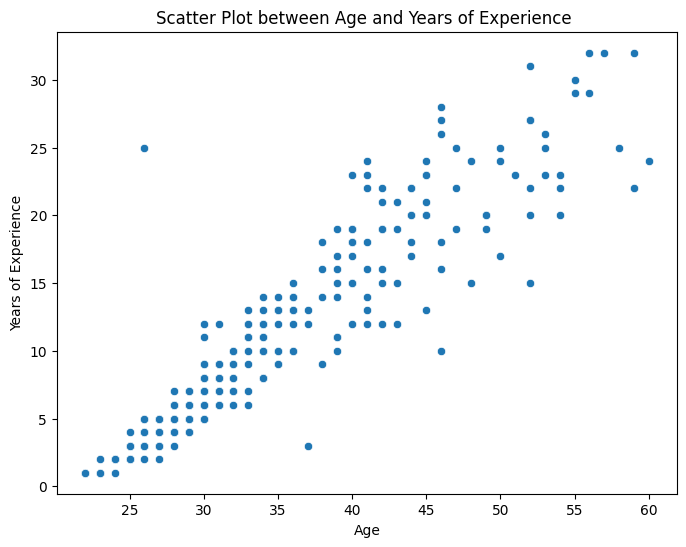

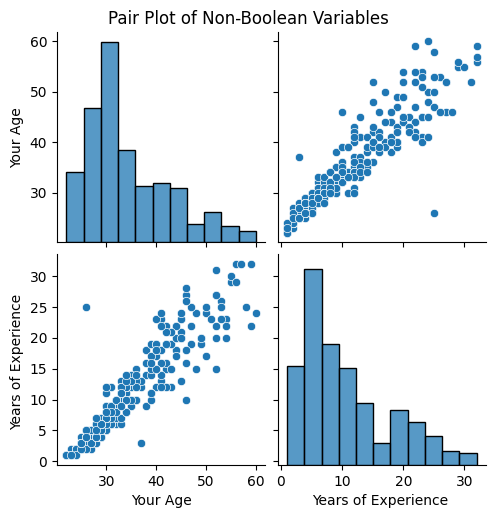

In [89]:


# Assuming df is your DataFrame containing non-boolean variables

# Scatter plot between two non-boolean variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Your Age', y='Years of Experience ')
plt.title('Scatter Plot between Age and Years of Experience ')
plt.xlabel('Age')
plt.ylabel('Years of Experience')
plt.show()

# Pair plot to visualize relationships between all pairs of non-boolean variables
sns.pairplot(df[[ 'Your Age', 'Years of Experience ']])
plt.suptitle('Pair Plot of Non-Boolean Variables', y=1.02)
plt.show()


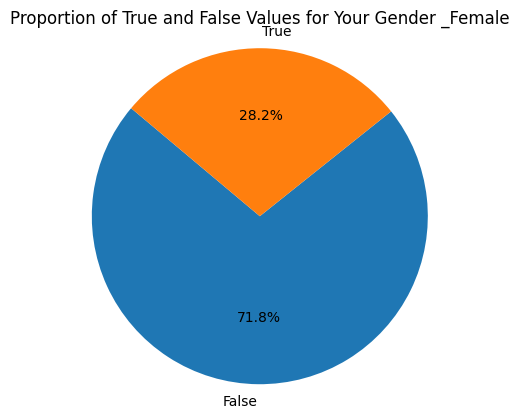

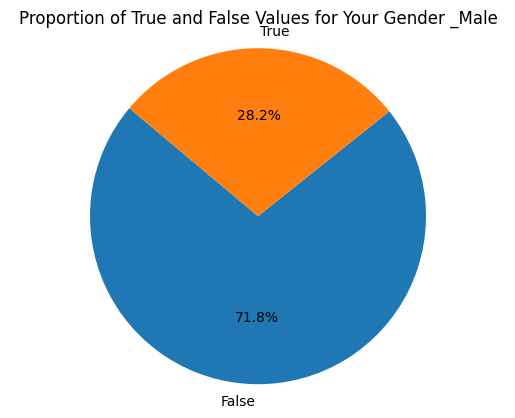

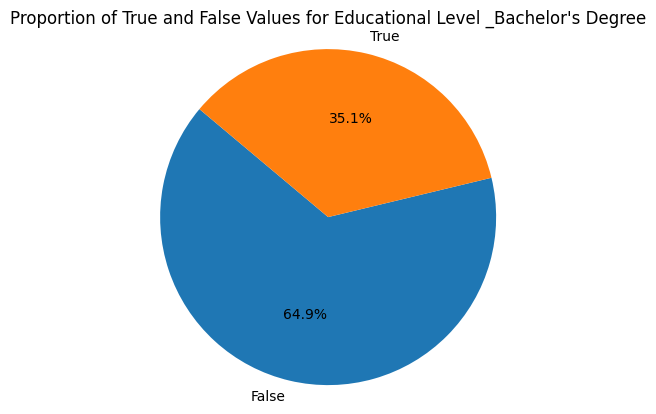

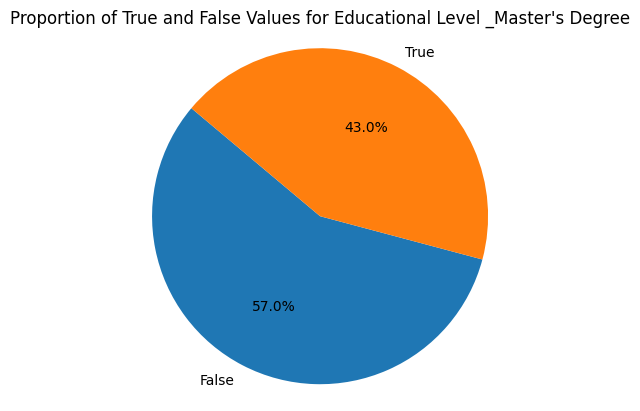

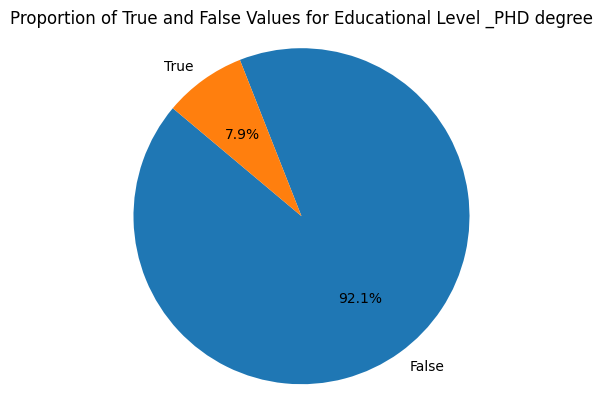

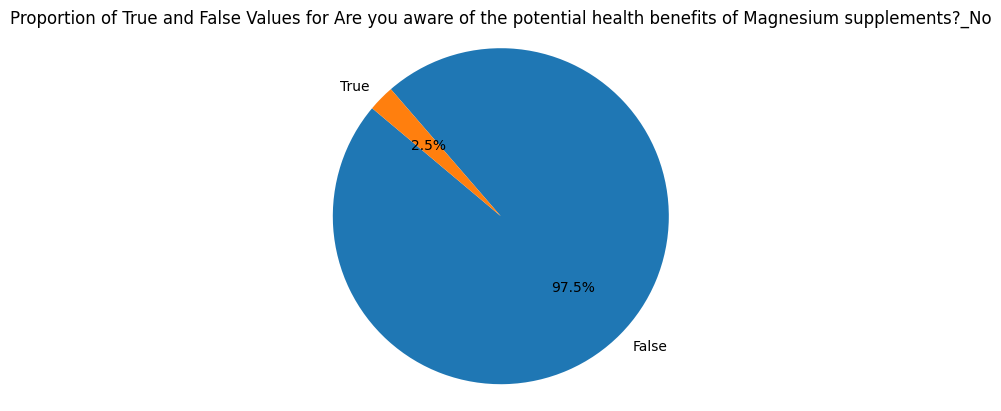

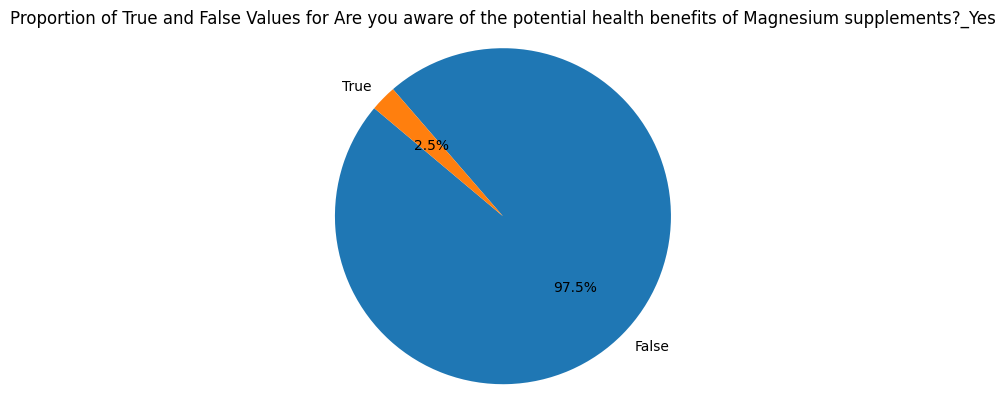

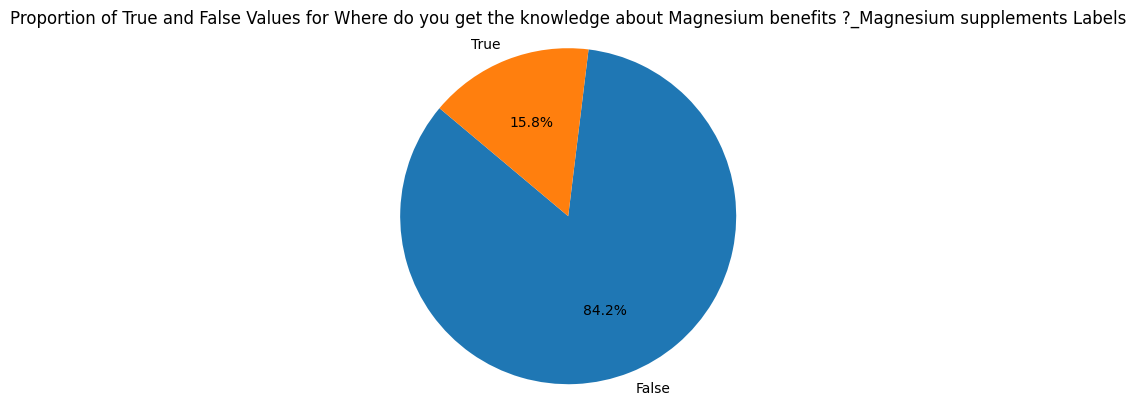

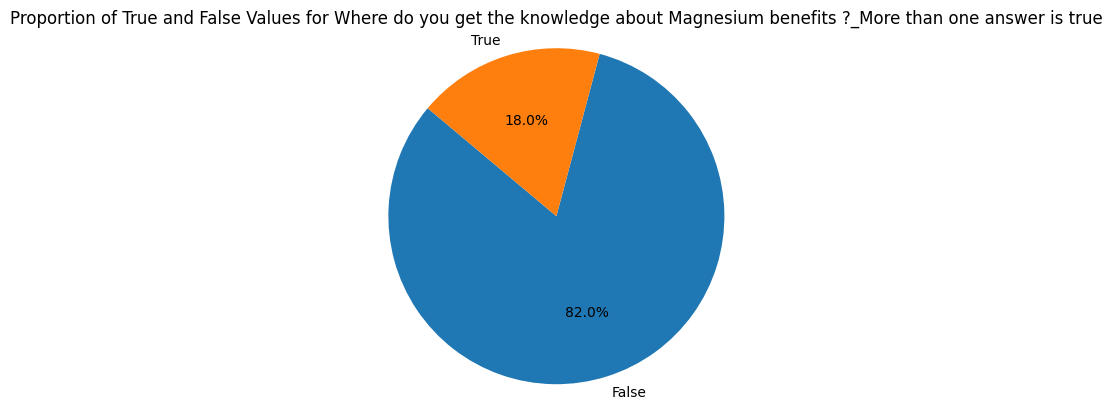

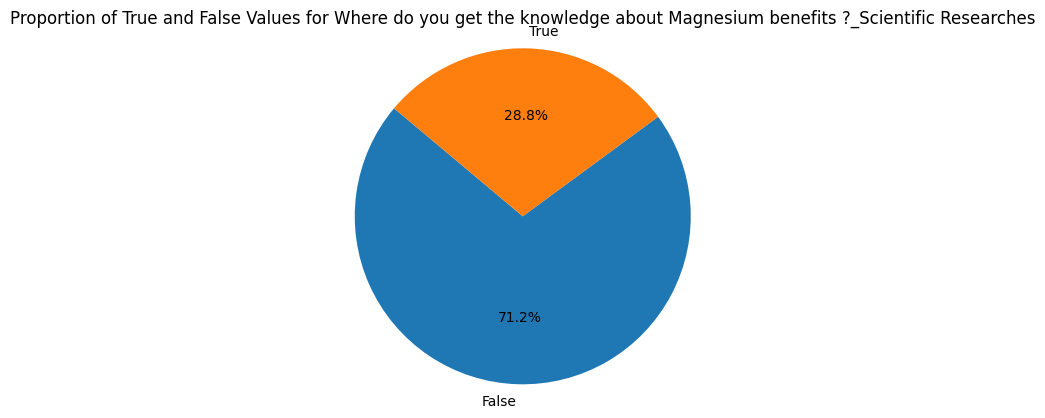

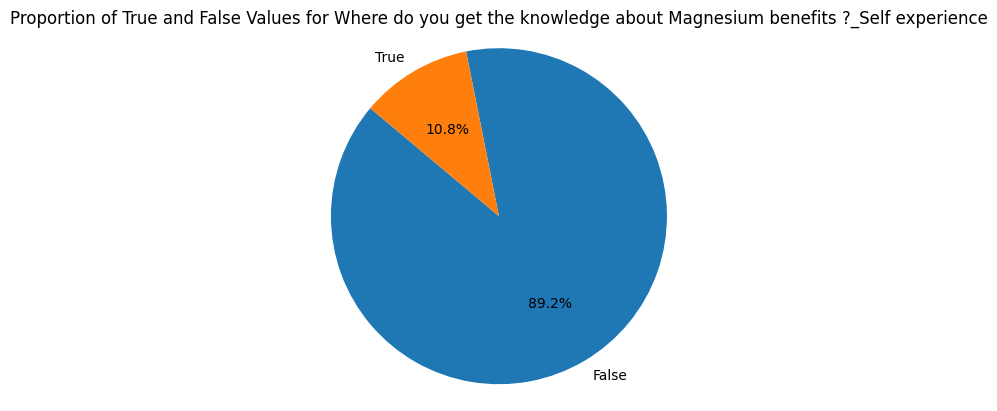

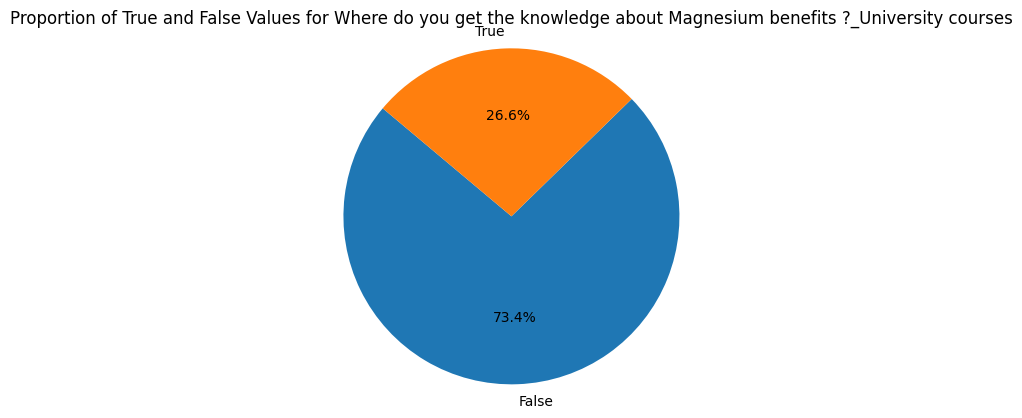

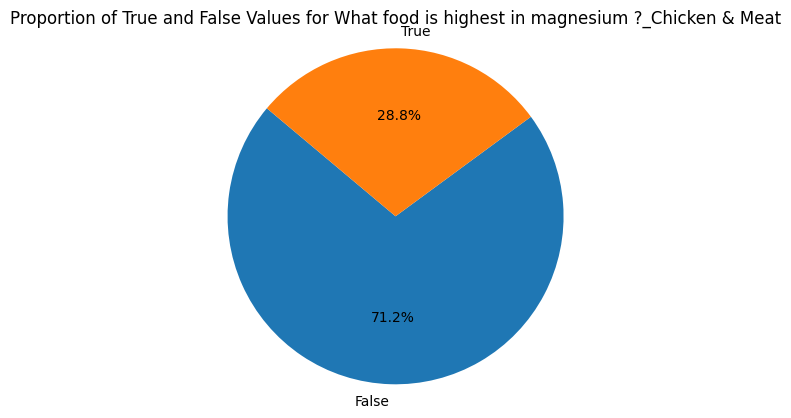

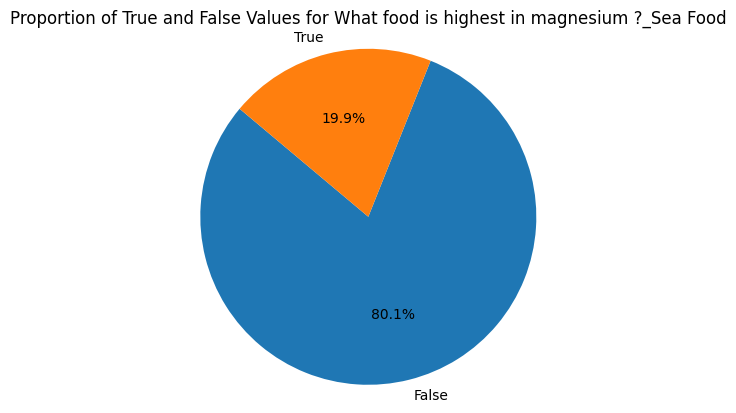

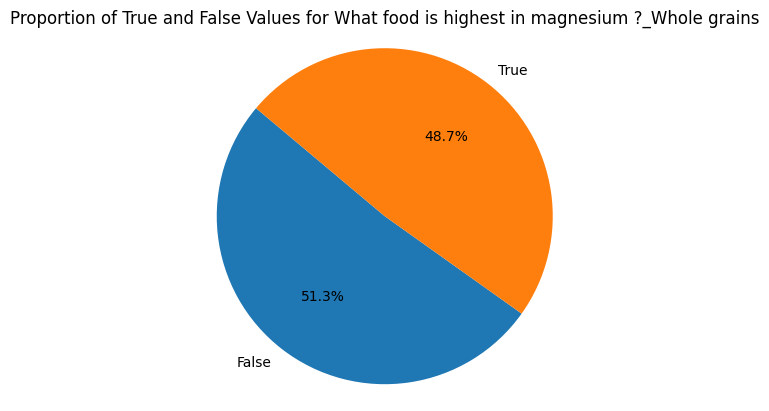

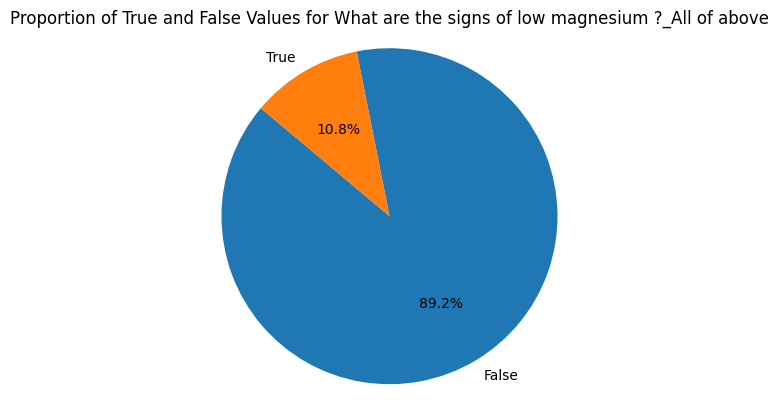

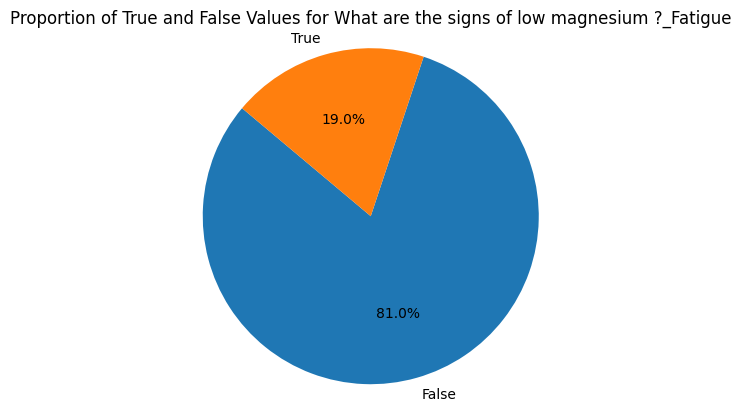

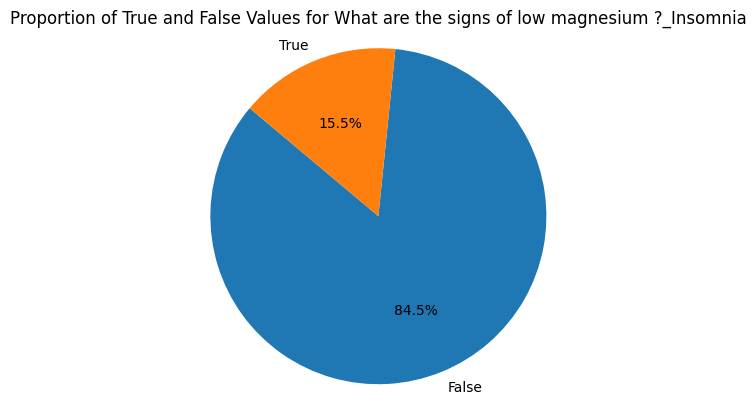

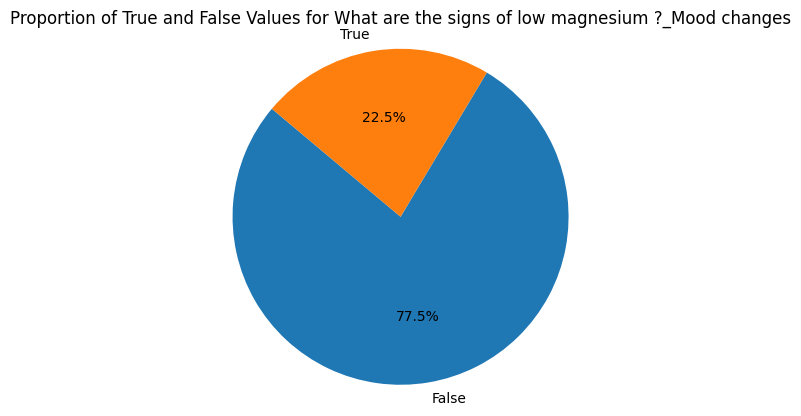

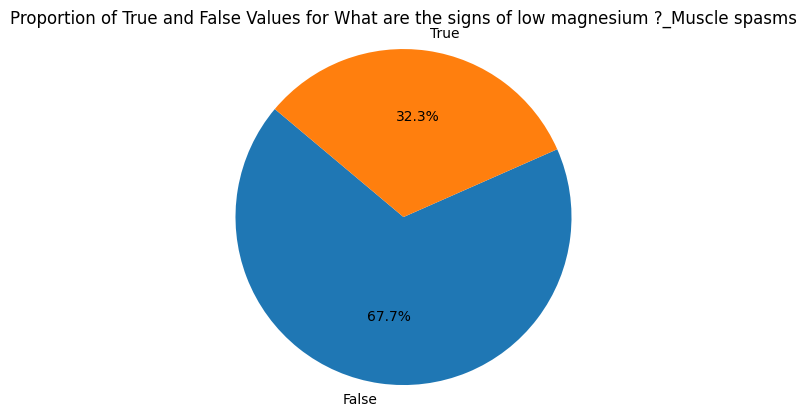

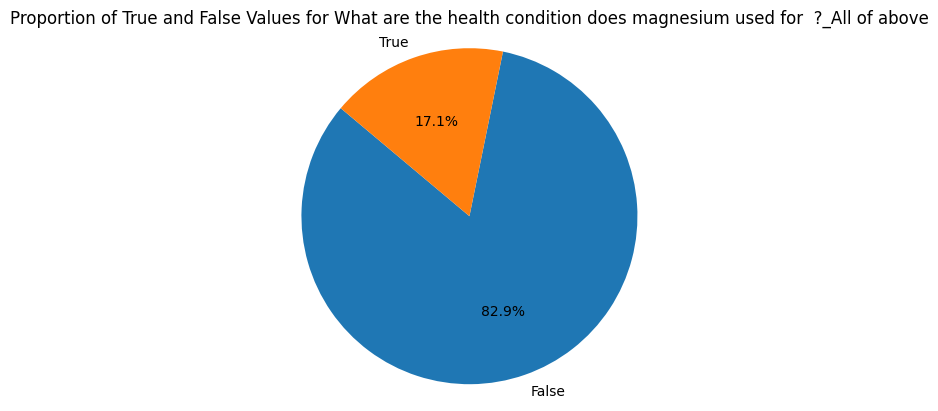

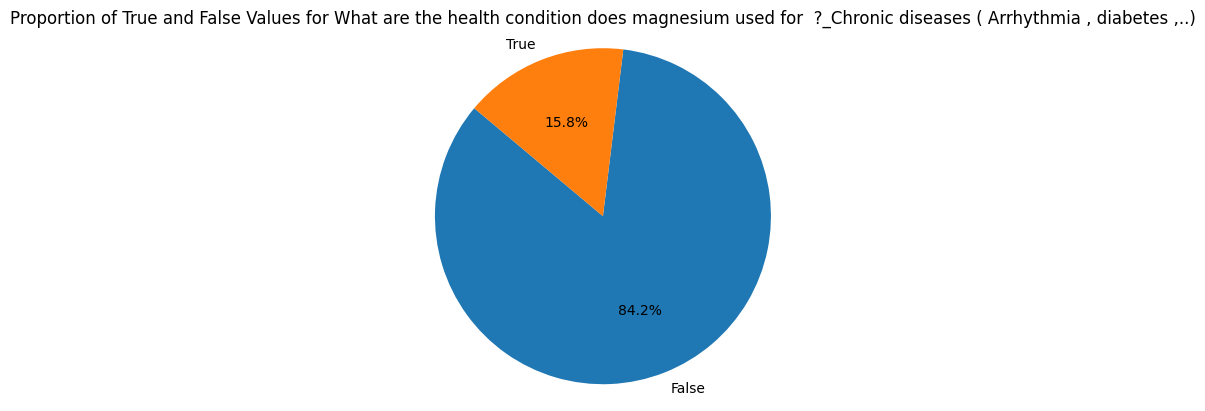

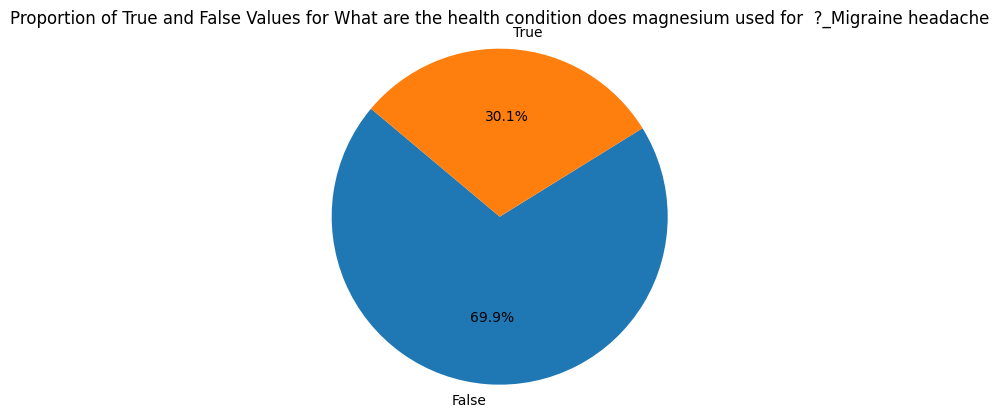

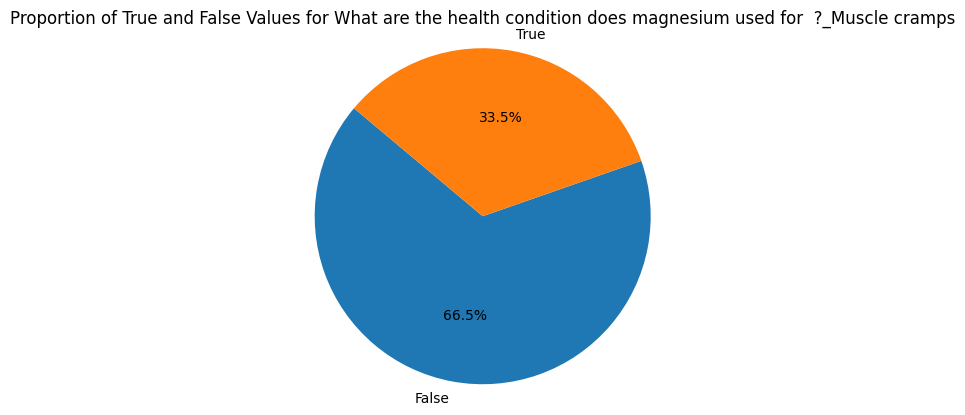

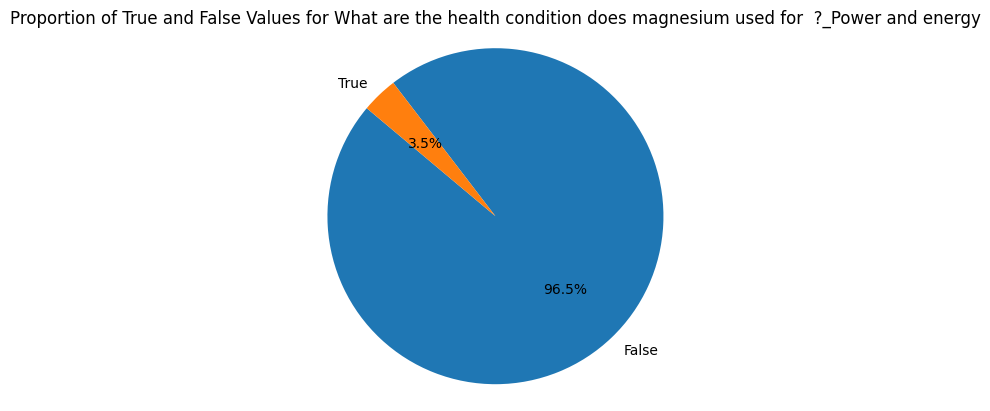

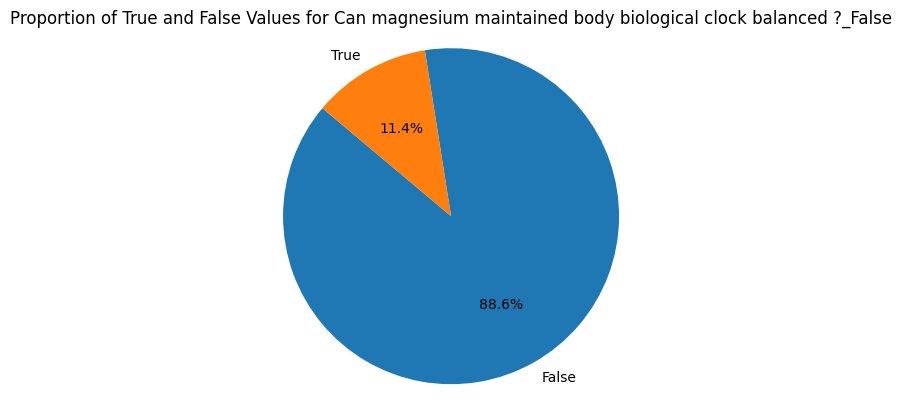

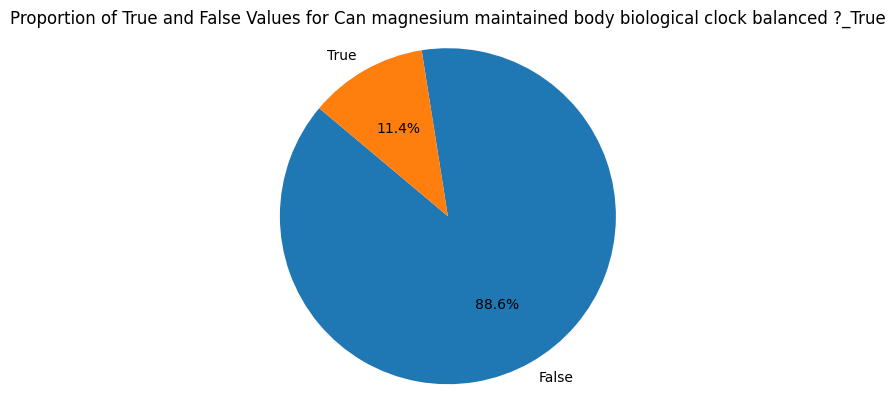

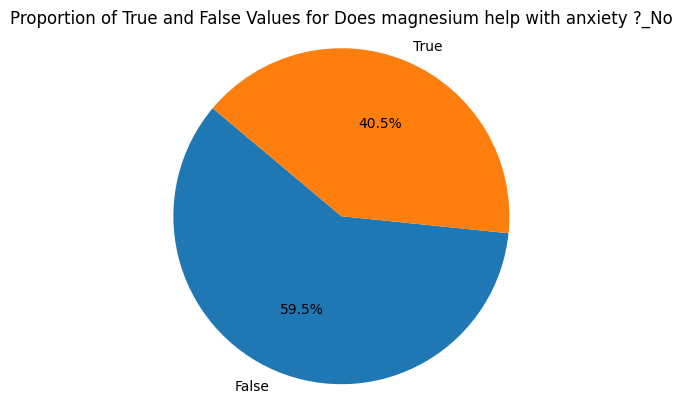

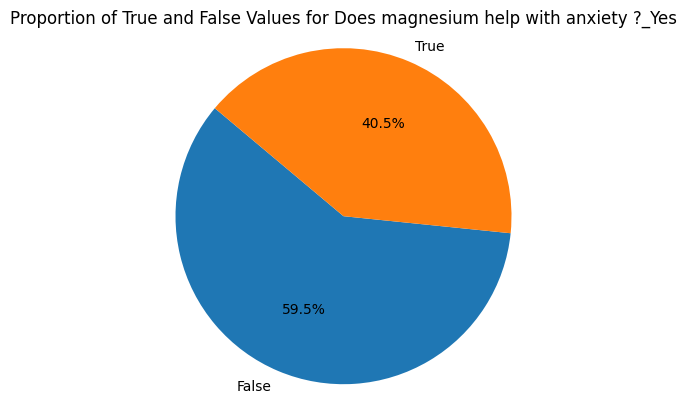

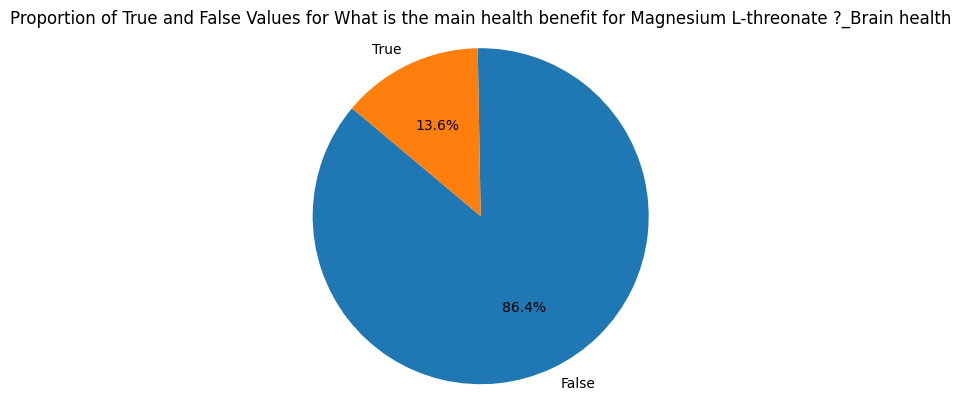

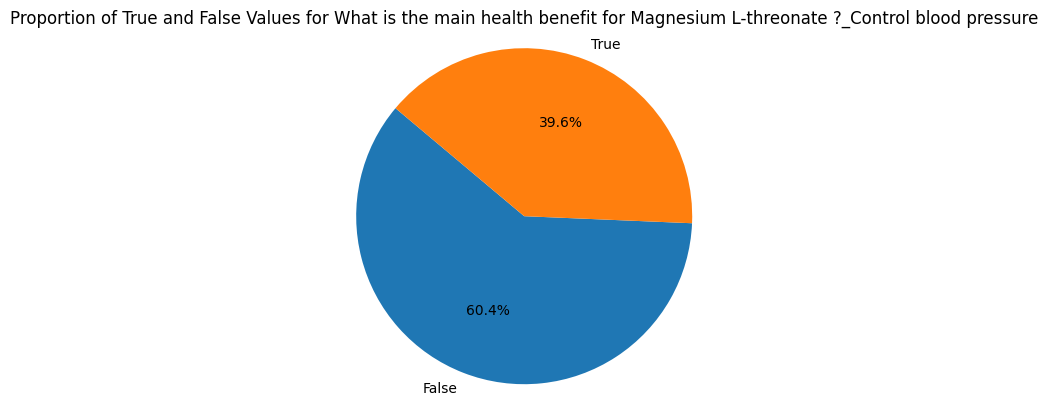

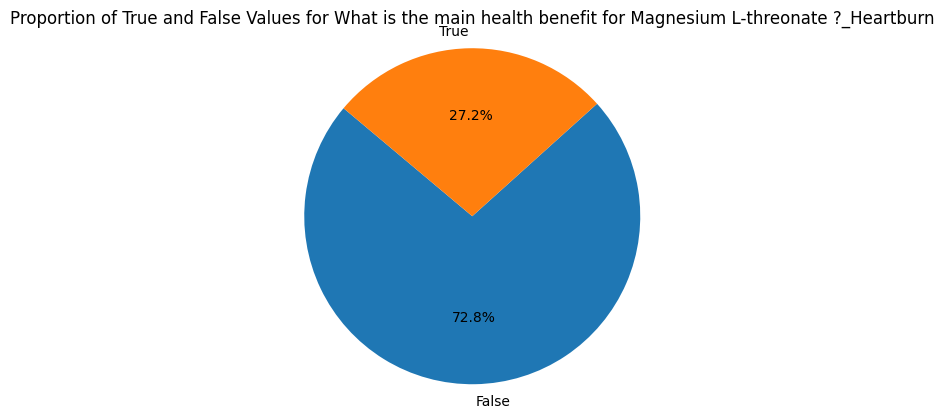

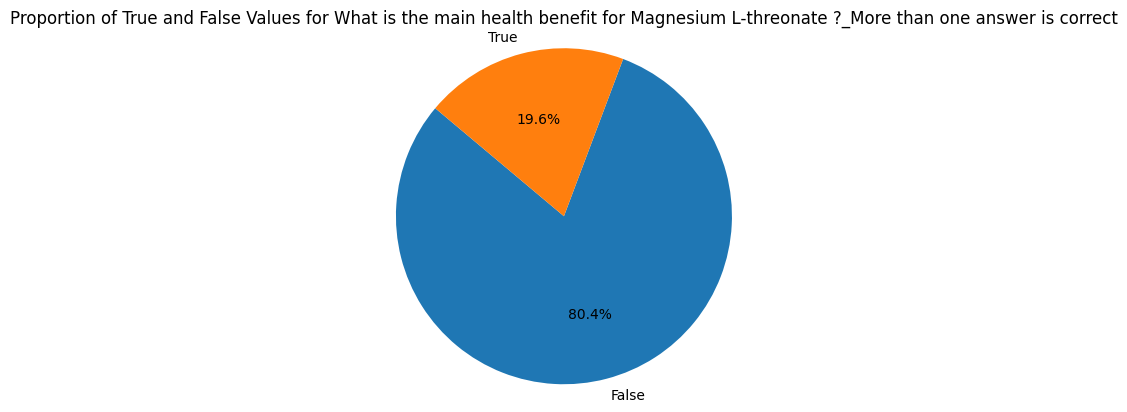

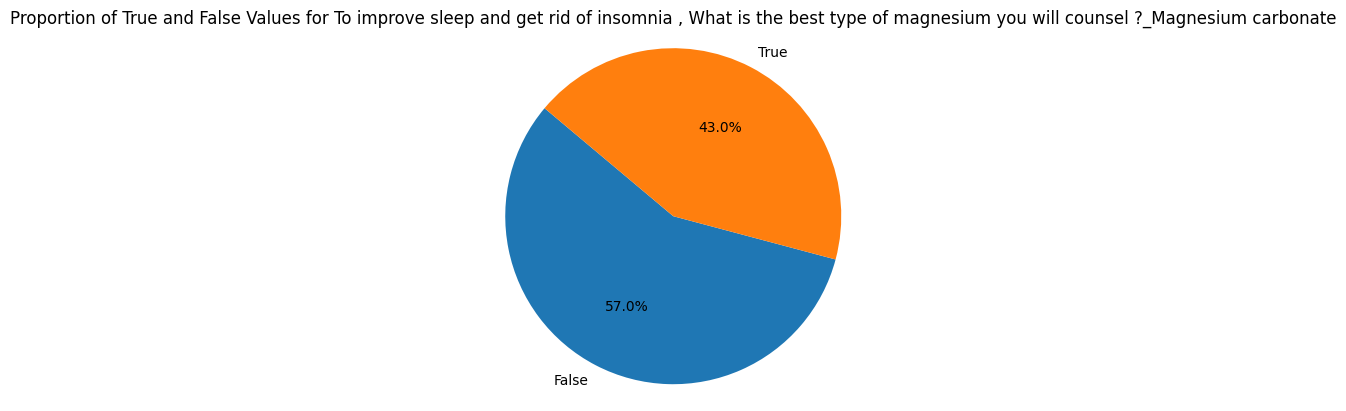

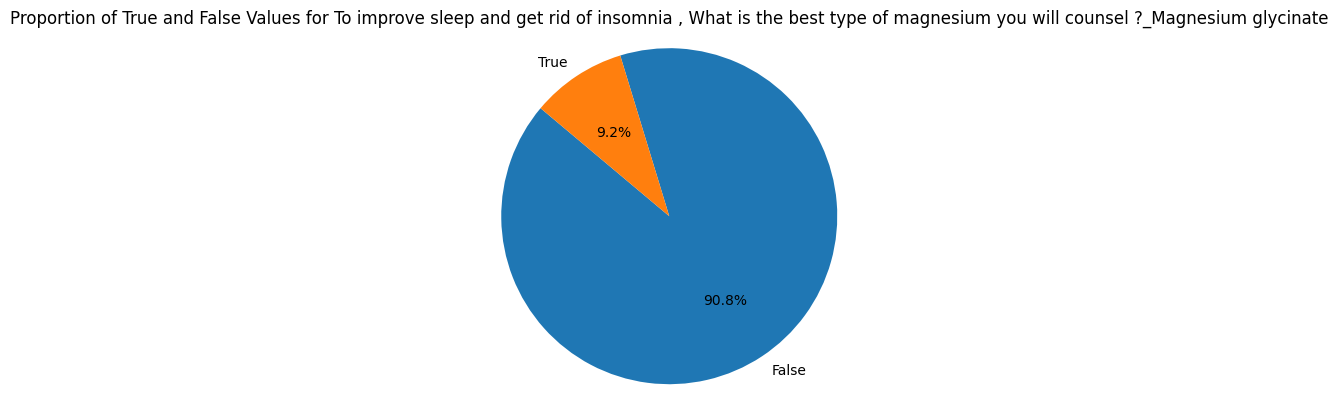

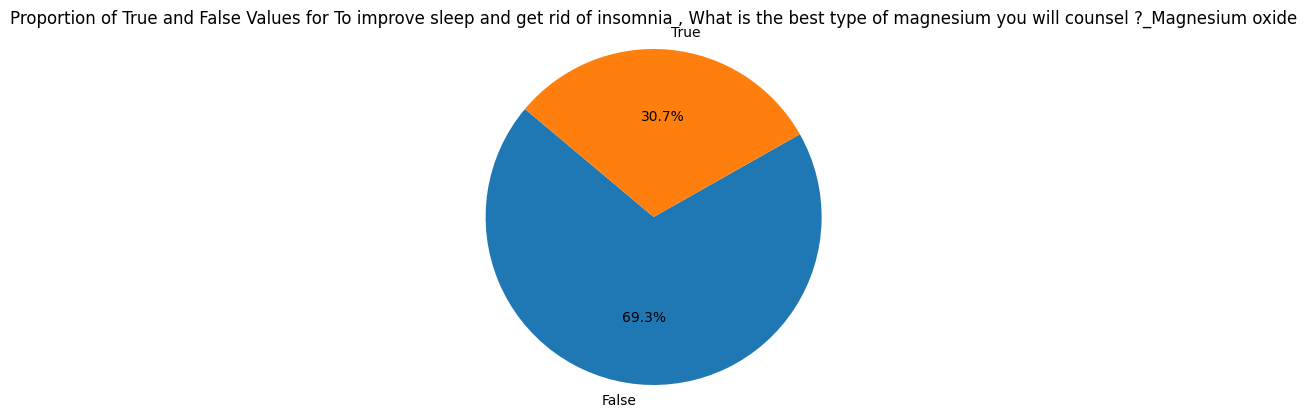

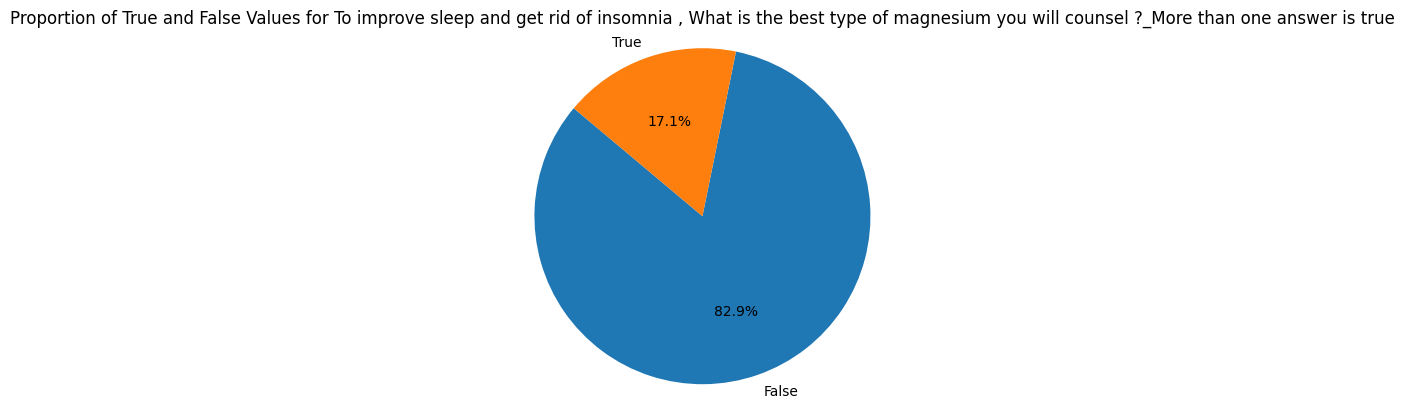

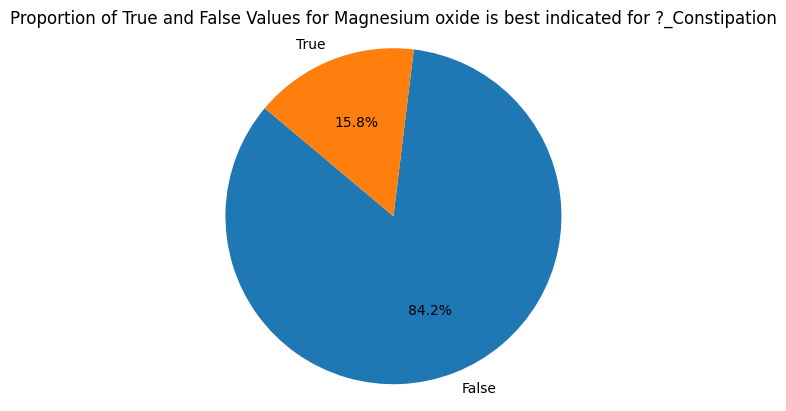

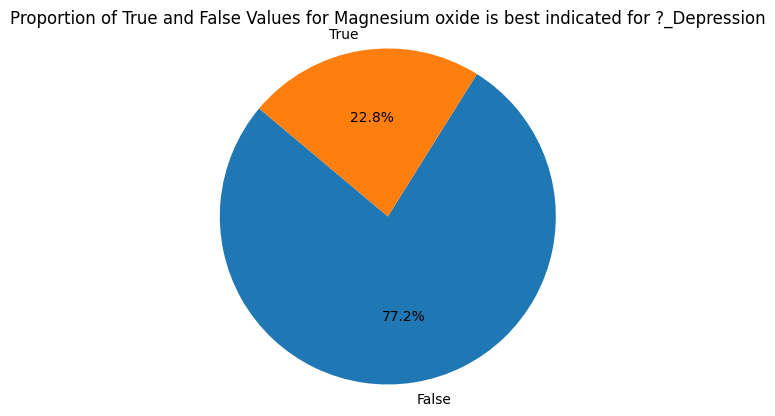

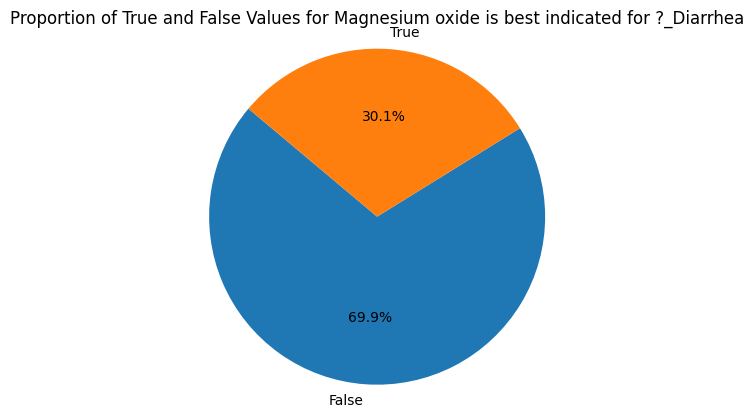

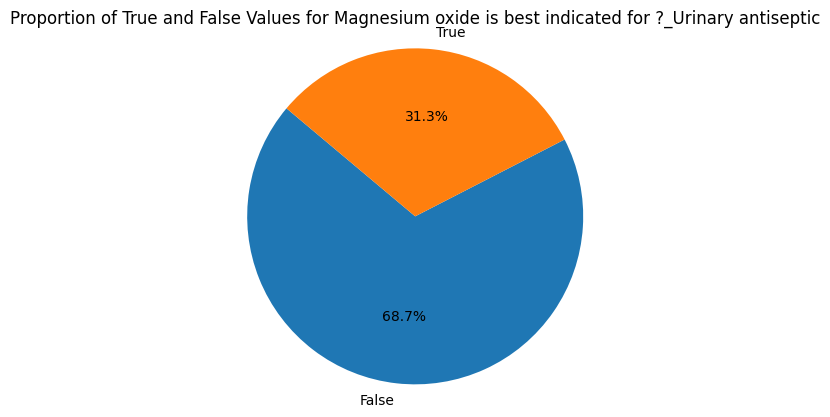

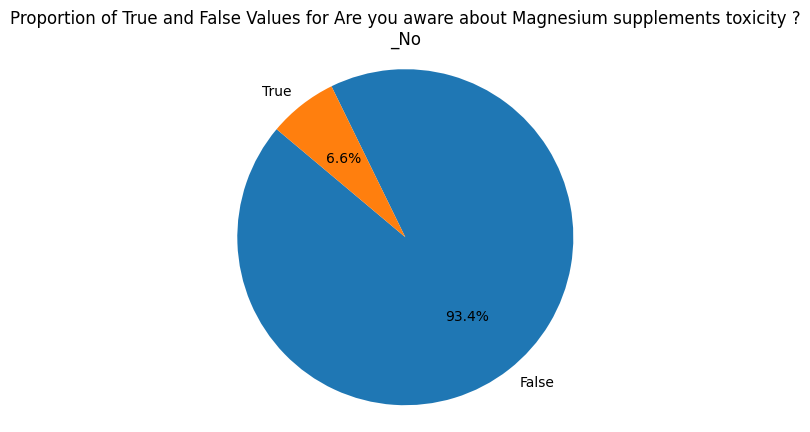

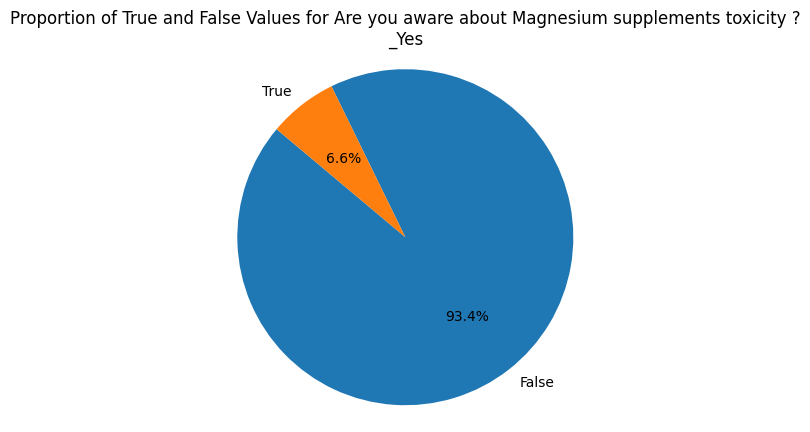

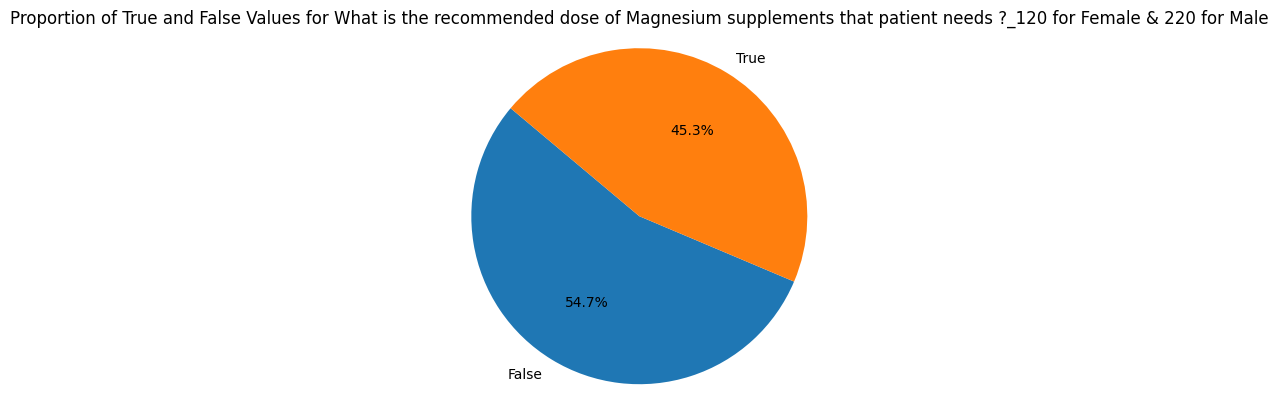

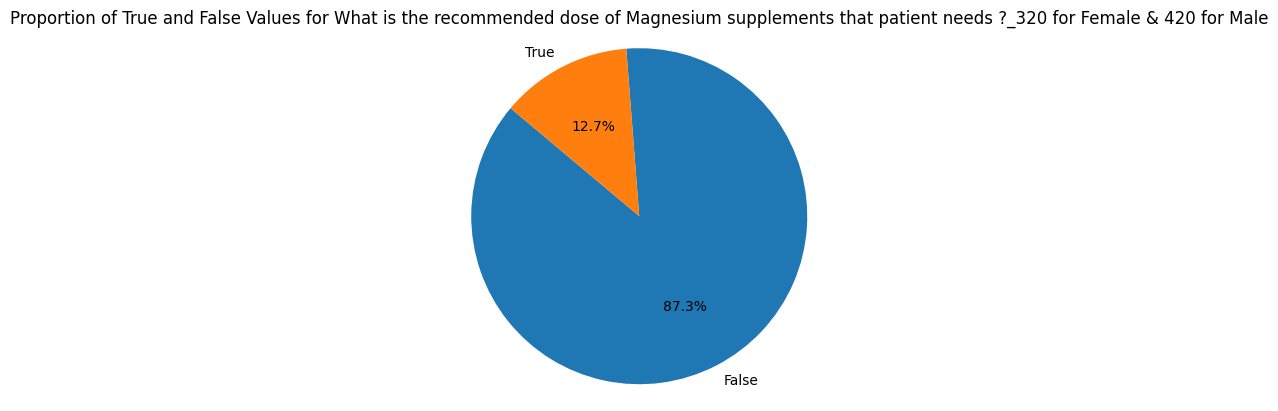

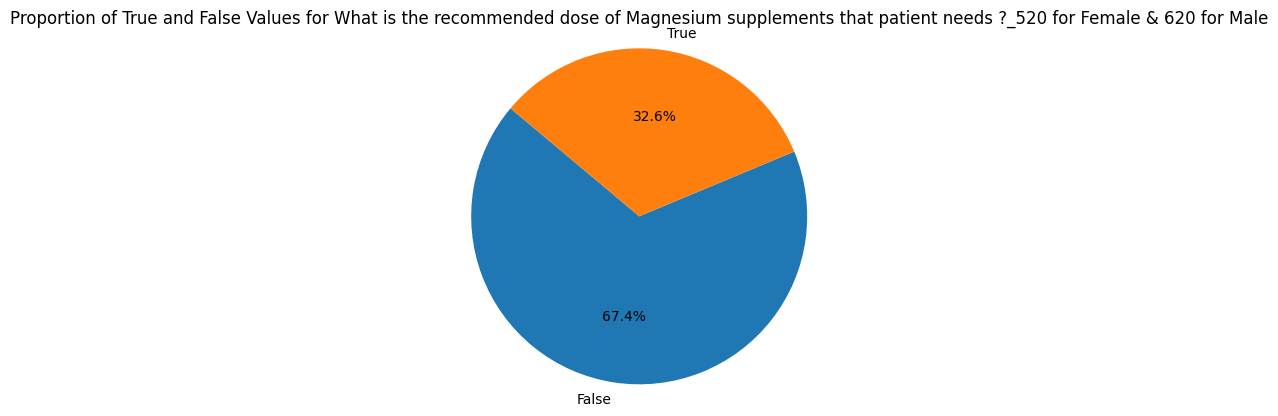

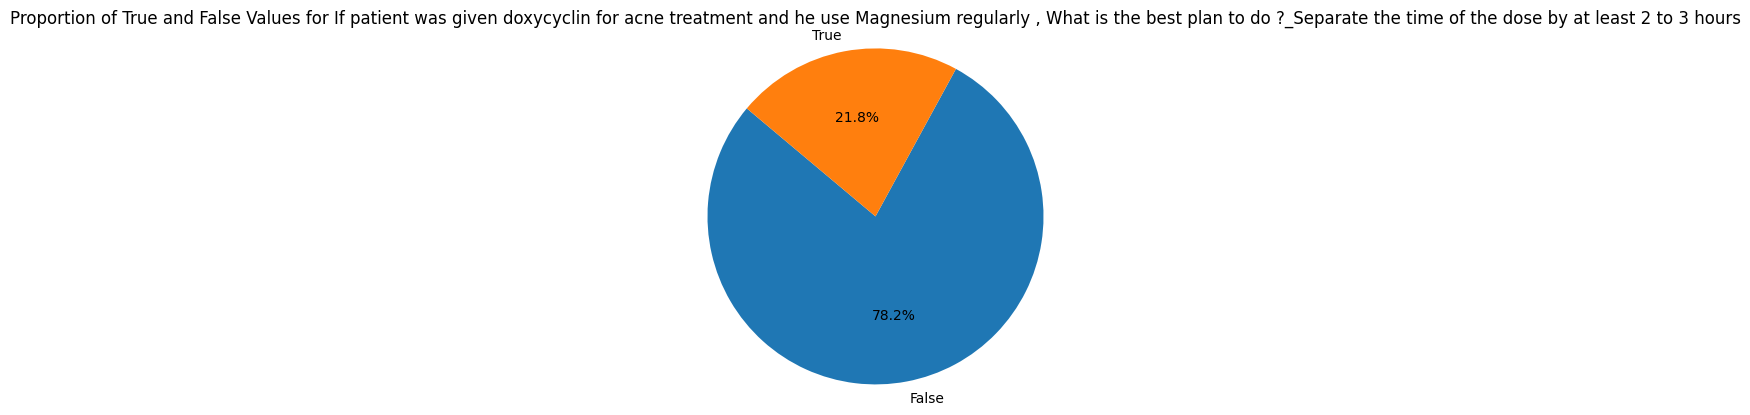

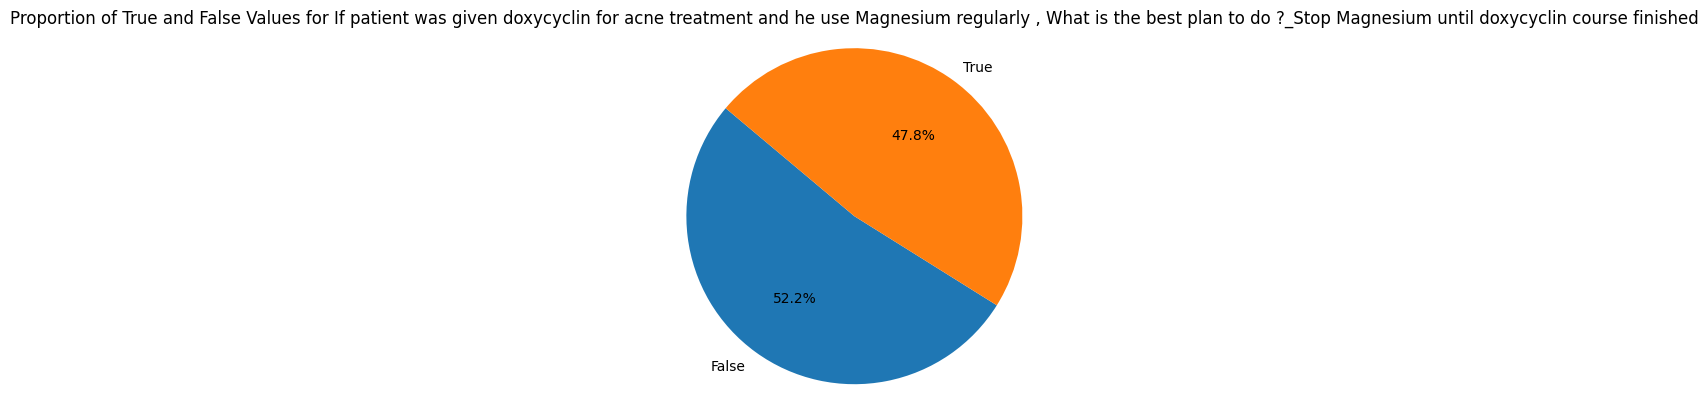

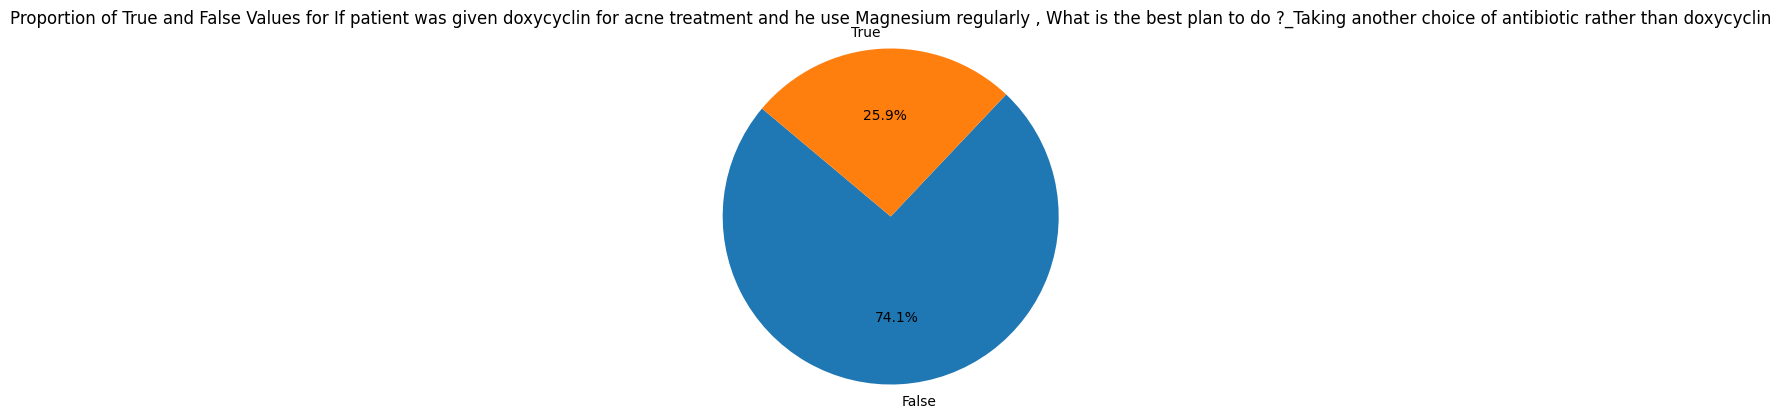

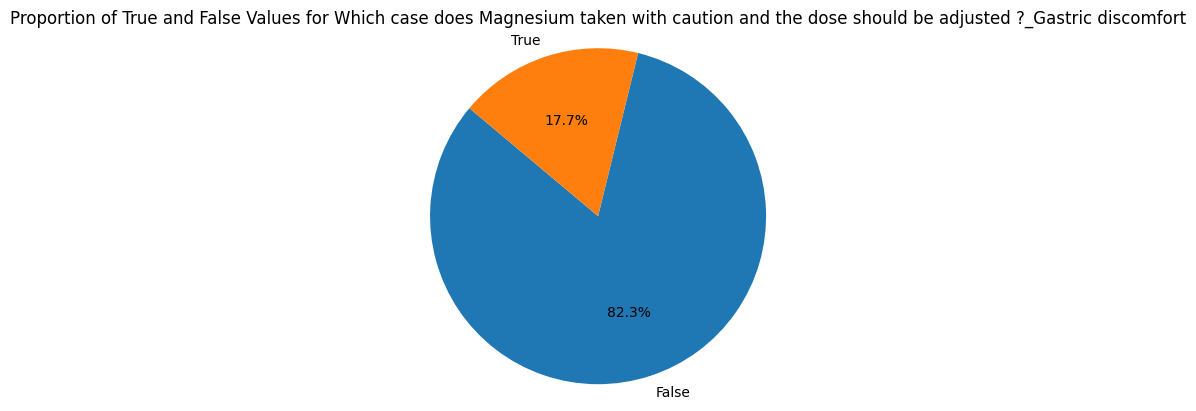

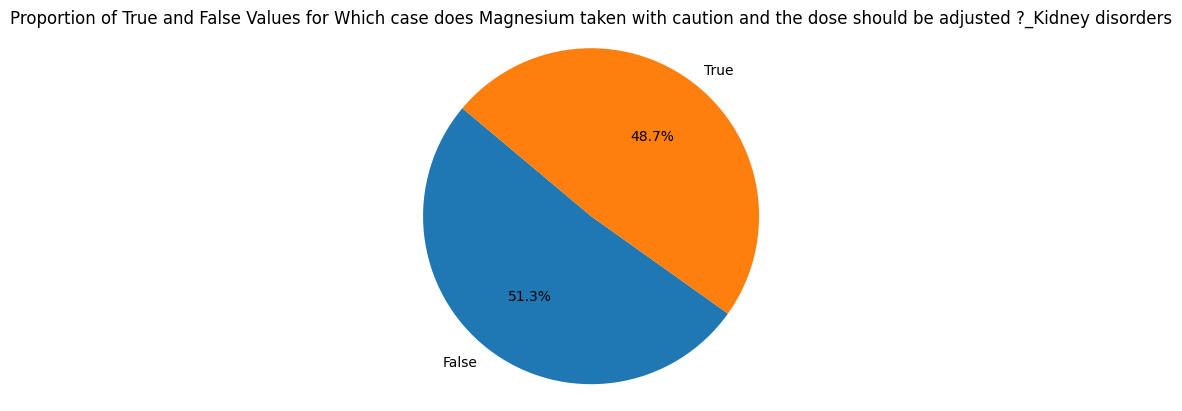

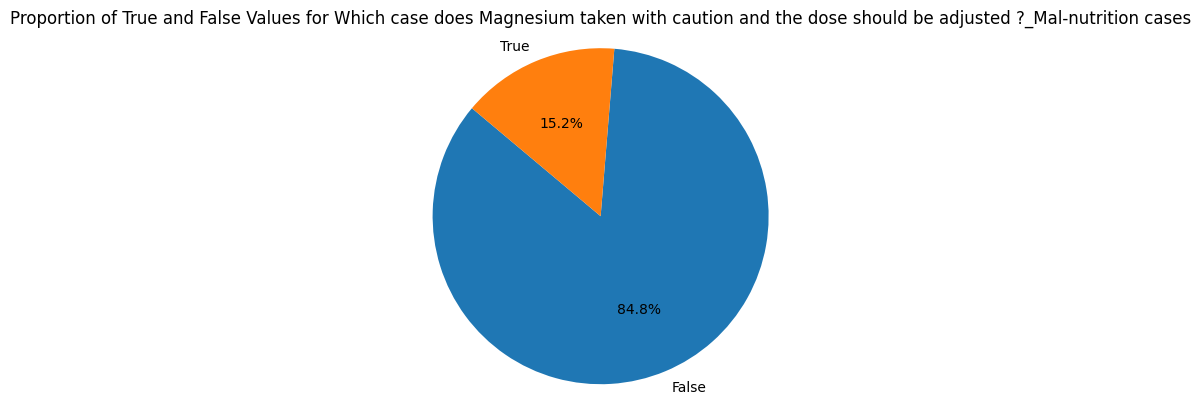

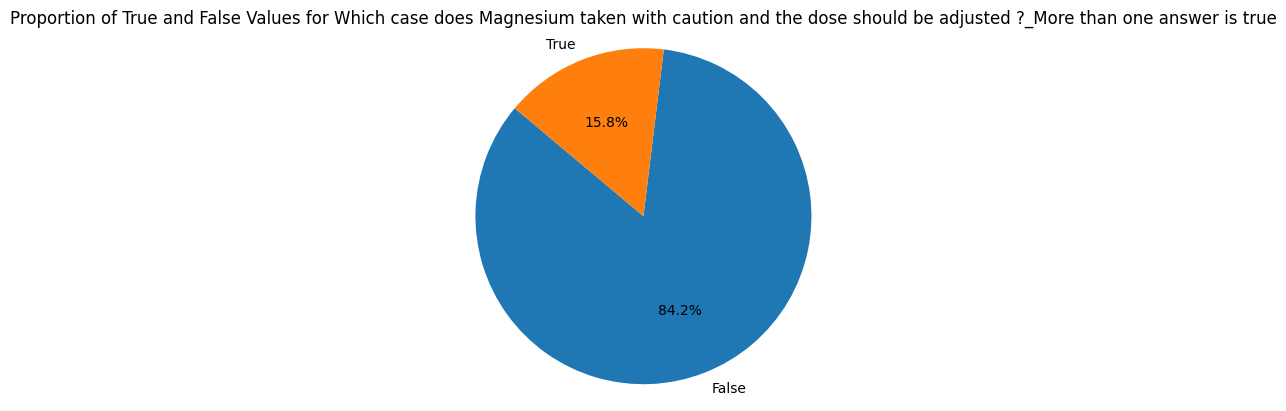

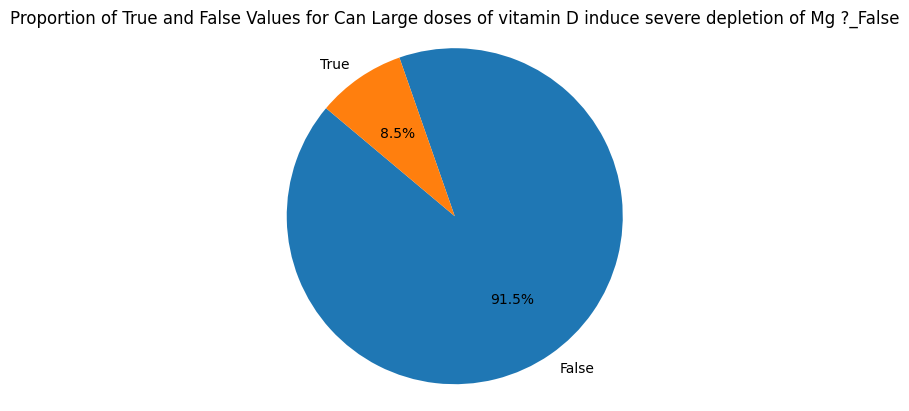

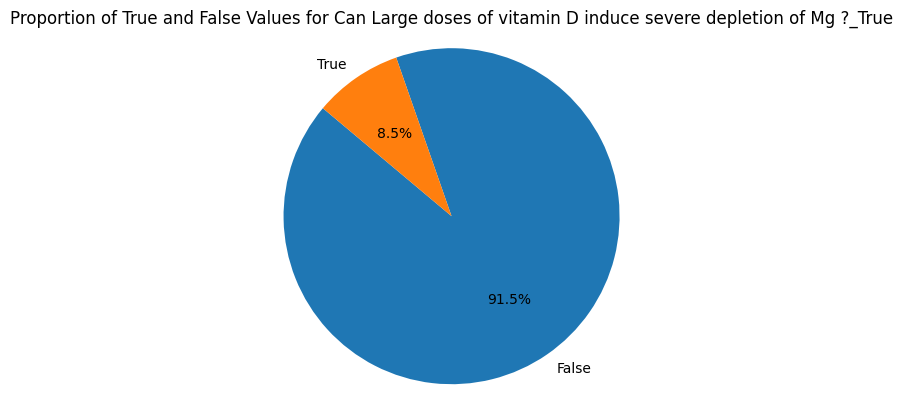

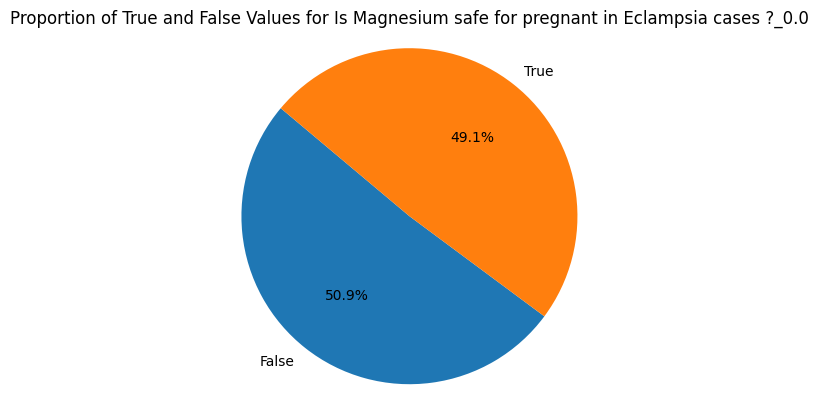

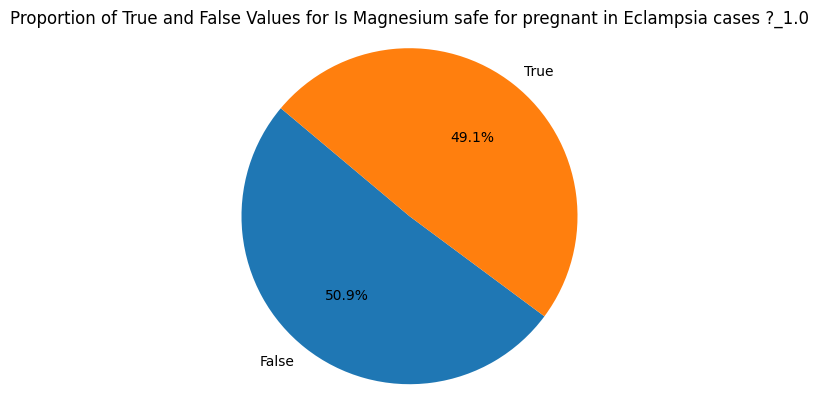

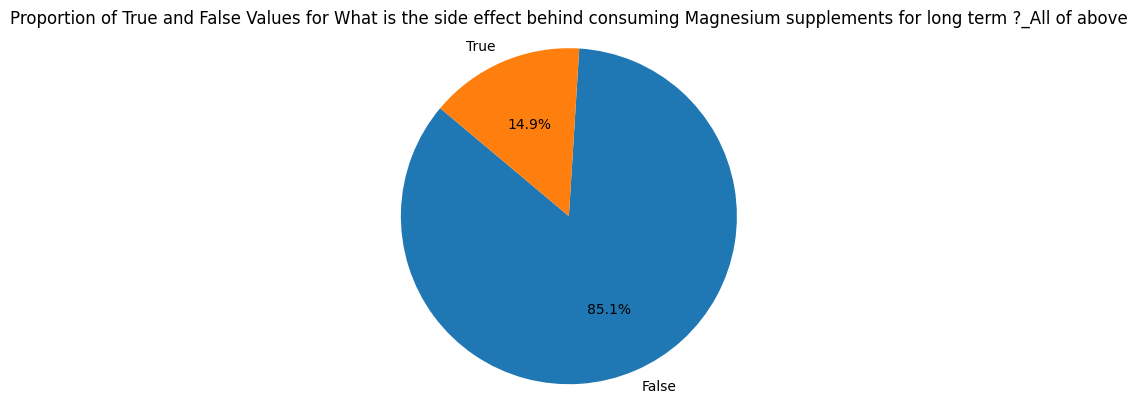

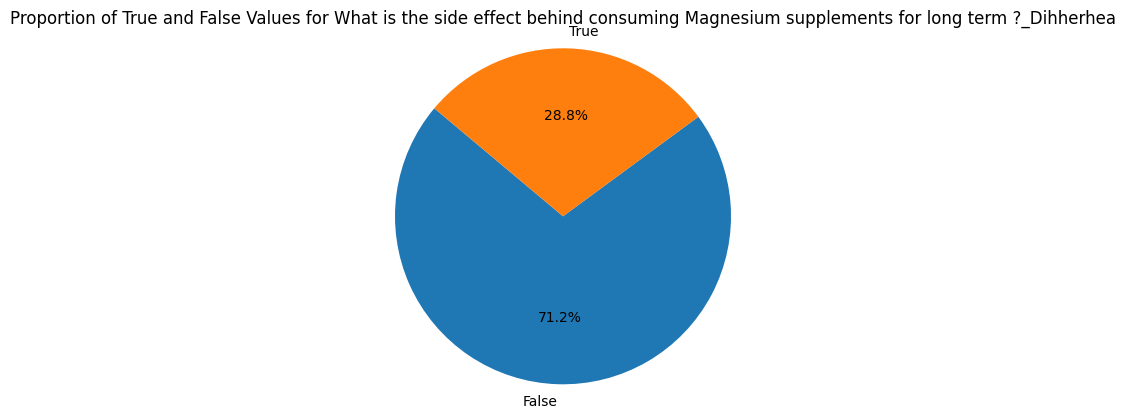

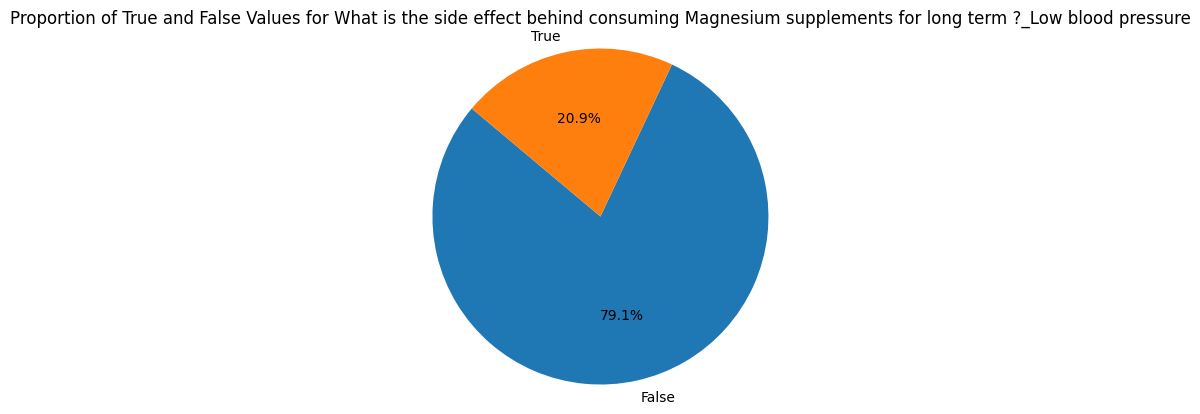

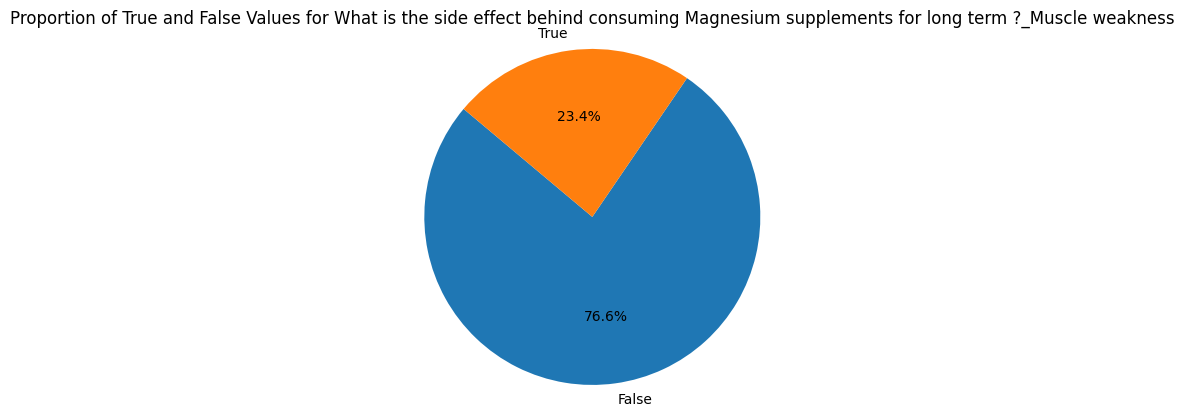

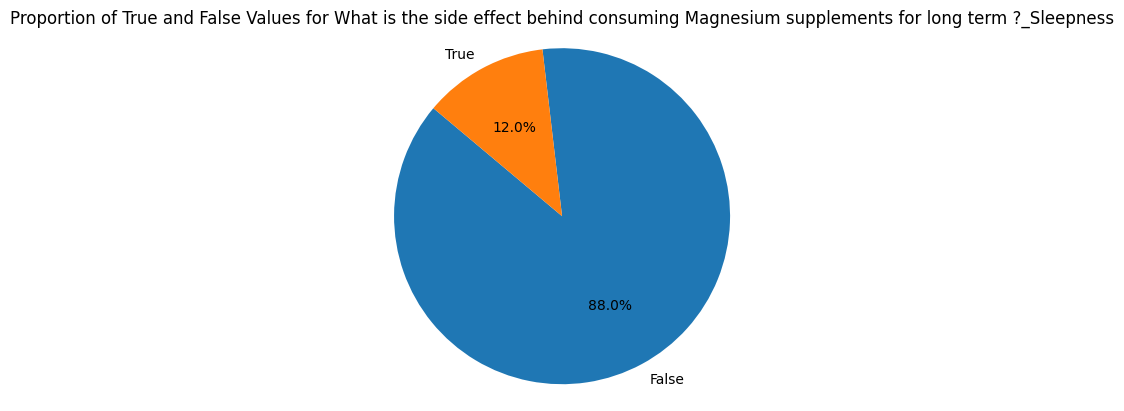

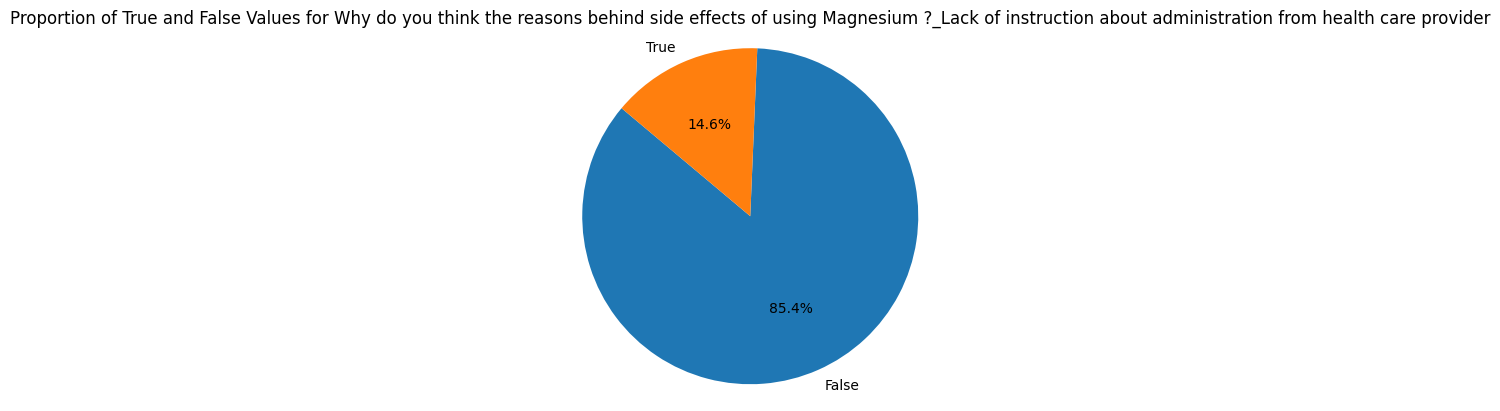

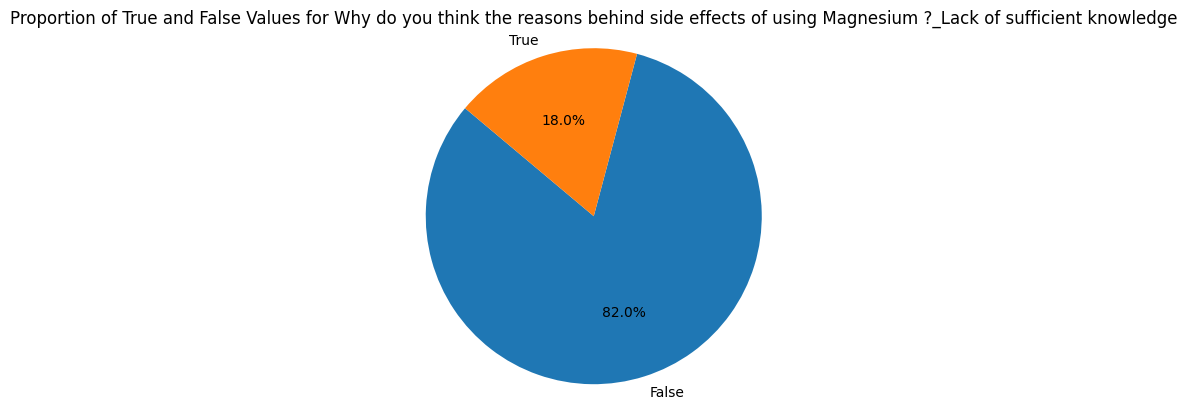

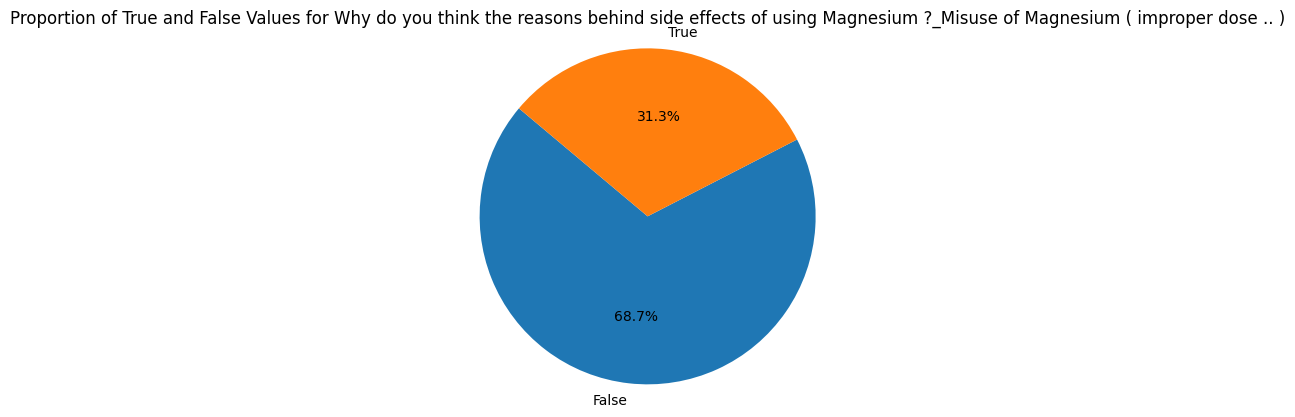

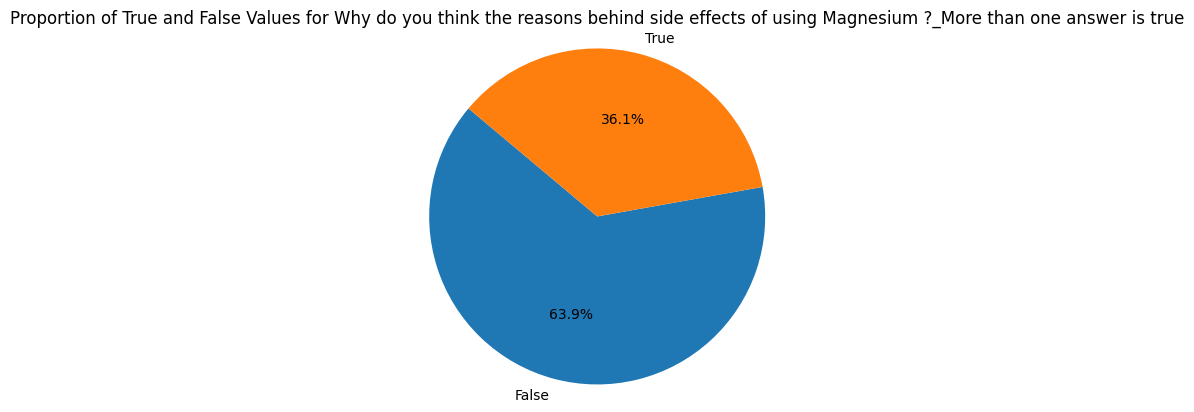

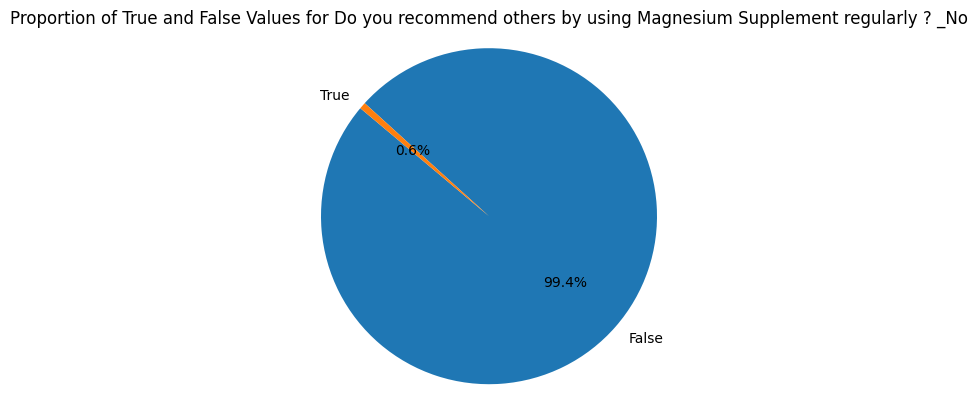

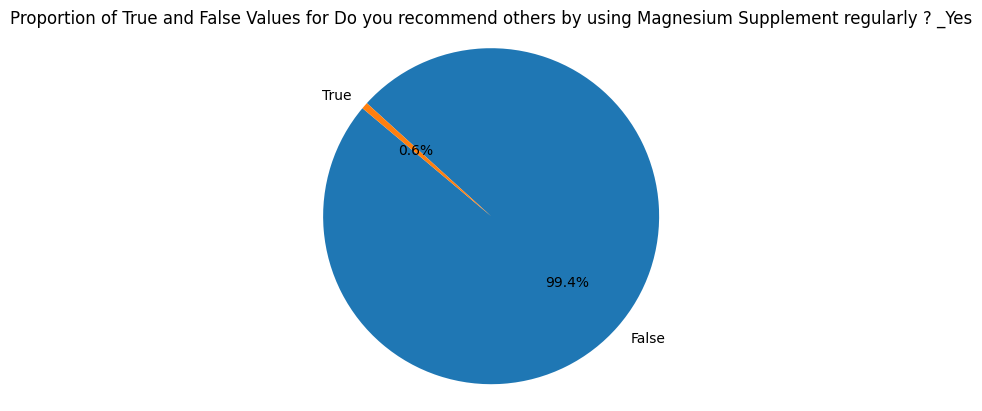

In [90]:
# Scatter plot between a boolean and a non-boolean variable
for column in columns_to_iterate:
    plt.figure()
    plt.pie(dc_df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Proportion of True and False Values for {column}')
    plt.axis('equal')
    plt.show()

# The P value calulated for all correct answers and age column

In [91]:


# Assuming dc_df is your DataFrame containing the data and selected_columns is the list of selected columns
selected_columns = ['Your Age', 'Years of Experience ',
                    'What food is highest in magnesium ?_Whole grains',
                    'What are the signs of low magnesium ?_All of above',
                    'What are the health condition does magnesium used for  ?_All of above',
                    'Can magnesium maintained body biological clock balanced ?_True', 
                    'Does magnesium help with anxiety ?_Yes', 
                    'What is the main health benefit for Magnesium L-threonate ?_Brain health',
                    'To improve sleep and get rid of insomnia , What is the best type of magnesium you will counsel ?_Magnesium glycinate',
                    'Magnesium oxide is best indicated for ?_Constipation', 'What is the recommended dose of Magnesium supplements that patient needs ?_320 for Female & 420 for Male', 
                    'If patient was given doxycyclin for acne treatment and he use Magnesium regularly , What is the best plan to do ?_Separate the time of the dose by at least 2 to 3 hours',
                    'Which case does Magnesium taken with caution and the dose should be adjusted ?_Kidney disorders',
                    'Can Large doses of vitamin D induce severe depletion of Mg ?_True', 'Is Magnesium safe for pregnant in Eclampsia cases ?_1.0',
                    'What is the side effect behind consuming Magnesium supplements for long term ?_All of above', 
                    'Why do you think the reasons behind side effects of using Magnesium ?_More than one answer is true']

# Create an empty dictionary to store the results
results = {}

# Iterate over each column
for column in selected_columns:
    # Filter the DataFrame to include only the rows where the answer is true
    correct_answers_df = dc_df[dc_df[column] == True]
    
    # Perform your analysis on the filtered DataFrame
    # For example, you can calculate mean age, median year of experience, etc.
    mean_age = correct_answers_df['Your Age'].mean()
    median_year_of_experience = correct_answers_df['Years of Experience '].median()

    # Perform the t-test
    t_statistic, p_value = stats.ttest_ind(correct_answers_df['Your Age'], correct_answers_df['Years of Experience '])
    
    # Calculate the standard deviation
    age_std = correct_answers_df['Your Age'].std()
    exp_std = correct_answers_df['Years of Experience '].std()
    
    # Store the results in the dictionary
    results[column] = {'mean_age': mean_age, 'median_year_of_experience': median_year_of_experience ,'t_statistic': t_statistic, 'p_value': p_value, 'age_std': age_std, 'exp_std': exp_std}

# Print the results
for column, result in results.items():
    print(f"Column: {column}")
    print(f"Mean Age: {result['mean_age']}")
    print(f"Median Year of Experience: {result['median_year_of_experience']}")
    print(f"t-statistic: {result['t_statistic']}, p-value: {result['p_value']}")
    print(f"Age Standard Deviation: {result['age_std']}")
    print(f"Experience Standard Deviation: {result['exp_std']}")
    print()
    

Column: Your Age
Mean Age: nan
Median Year of Experience: nan
t-statistic: nan, p-value: nan
Age Standard Deviation: nan
Experience Standard Deviation: nan

Column: Years of Experience 
Mean Age: 22.666666666666668
Median Year of Experience: 1.0
t-statistic: 65.00000000000001, p-value: 1.8082615043720467e-14
Age Standard Deviation: 0.816496580927726
Experience Standard Deviation: 0.0

Column: What food is highest in magnesium ?_Whole grains
Mean Age: 35.76543209876543
Median Year of Experience: 9.0
t-statistic: 25.191994114870628, p-value: 3.9869457927294197e-78
Age Standard Deviation: 9.395084752890435
Experience Standard Deviation: 7.78854868914805

Column: What are the signs of low magnesium ?_All of above
Mean Age: 35.44117647058823
Median Year of Experience: 8.5
t-statistic: 9.859320765231507, p-value: 1.3287640559787818e-14
Age Standard Deviation: 10.198607083948422
Experience Standard Deviation: 9.235867461794587

Column: What are the health condition does magnesium used for  ?_

C:\Users\samir\miniconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [92]:
selected_columns = ['Your Age', 'Years of Experience ',
                    'What food is highest in magnesium ?_Whole grains',
                    'What are the signs of low magnesium ?_All of above',
                    'What are the health condition does magnesium used for  ?_All of above',
                    'Can magnesium maintained body biological clock balanced ?_True', 
                    'Does magnesium help with anxiety ?_Yes', 
                    'What is the main health benefit for Magnesium L-threonate ?_Brain health',
                    'To improve sleep and get rid of insomnia , What is the best type of magnesium you will counsel ?_Magnesium glycinate',
                    'Magnesium oxide is best indicated for ?_Constipation', 
                    'What is the recommended dose of Magnesium supplements that patient needs ?_320 for Female & 420 for Male', 
                    'If patient was given doxycyclin for acne treatment and he use Magnesium regularly , What is the best plan to do ?_Separate the time of the dose by at least 2 to 3 hours',
                    'Which case does Magnesium taken with caution and the dose should be adjusted ?_Kidney disorders',
                    'Can Large doses of vitamin D induce severe depletion of Mg ?_True', 
                    'Is Magnesium safe for pregnant in Eclampsia cases ?_1.0',
                    'What is the side effect behind consuming Magnesium supplements for long term ?_All of above', 
                    'Why do you think the reasons behind side effects of using Magnesium ?_More than one answer is true']

# Select the columns from dc_df based on the selected_column names
selected_df = dc_df[selected_columns]

# Generate descriptive statistics for the selected columns
description = selected_df.describe()

# Print the descriptive statistics
print(description)


         Your Age  Years of Experience 
count  316.000000            316.000000
mean    34.268987             10.566456
std      8.537896              7.354861
min     22.000000              1.000000
25%     28.000000              5.000000
50%     31.000000              8.000000
75%     40.000000             15.000000
max     60.000000             32.000000


# Here you will find simple analysis and the count for each column in details that is easily understandable 

In [93]:
# Create an empty dictionary to store the counts
boolean_counts = {}

# Iterate over each boolean column
for column in selected_columns:
    # Calculate value counts for the column
    counts = dc_df[column].value_counts()
    
    # Store the counts in the dictionary
    boolean_counts[column] = counts

# Print the counts
for column, counts in boolean_counts.items():
    print(f"Column: {column}")
    print(counts)
    print()


Column: Your Age
Your Age
29    31
30    25
28    23
31    19
26    18
27    16
25    15
33    15
34    15
40    10
32    10
36     9
35     9
24     9
41     8
39     8
42     7
45     7
52     6
46     6
44     6
38     4
43     4
49     3
47     3
53     3
22     3
50     3
23     3
54     3
37     3
55     2
48     2
56     2
59     2
51     1
57     1
58     1
60     1
Name: count, dtype: int64

Column: Years of Experience 
Years of Experience 
6     30
4     27
5     26
7     19
3     19
8     18
2     17
12    15
9     14
11    13
10    13
13    11
22     8
20     8
19     8
15     8
18     7
14     7
23     7
1      6
24     5
25     5
16     5
17     4
32     3
21     3
27     3
29     2
26     2
30     1
31     1
28     1
Name: count, dtype: int64

Column: What food is highest in magnesium ?_Whole grains
What food is highest in magnesium ?_Whole grains
True     162
False    154
Name: count, dtype: int64

Column: What are the signs of low magnesium ?_All of above
What are the 

In [94]:
# Create an empty dictionary to store the percentages
true_percentages = {}

# Iterate over each boolean column
for column in selected_columns:
    # Calculate the total number of entries in the column
    total_entries = dc_df[column].count()
    
    # Calculate the number of True values in the column
    true_count = dc_df[column].sum()
    
    # Calculate the percentage of True values
    true_percentage = (true_count / total_entries) * 100
    
    # Store the percentage in the dictionary
    true_percentages[column] = true_percentage

# Print the percentages
for column, percentage in true_percentages.items():
    print(f"Column: {column}")
    print(f"Percentage of True values: {percentage:.2f}%")
    print()


Column: Your Age
Percentage of True values: 3426.90%

Column: Years of Experience 
Percentage of True values: 1056.65%

Column: What food is highest in magnesium ?_Whole grains
Percentage of True values: 51.27%

Column: What are the signs of low magnesium ?_All of above
Percentage of True values: 10.76%

Column: What are the health condition does magnesium used for  ?_All of above
Percentage of True values: 17.09%

Column: Can magnesium maintained body biological clock balanced ?_True
Percentage of True values: 88.61%

Column: Does magnesium help with anxiety ?_Yes
Percentage of True values: 59.49%

Column: What is the main health benefit for Magnesium L-threonate ?_Brain health
Percentage of True values: 13.61%

Column: To improve sleep and get rid of insomnia , What is the best type of magnesium you will counsel ?_Magnesium glycinate
Percentage of True values: 9.18%

Column: Magnesium oxide is best indicated for ?_Constipation
Percentage of True values: 15.82%

Column: What is the re

In [95]:
# Group by education level and calculate the sum of True values for each boolean column
grouped_df = dc_df.groupby(['Educational Level _Bachelor\'s Degree',
                             'Educational Level _Master\'s Degree',
                             'Educational Level _PHD degree'])[selected_columns].sum()

# Print the grouped DataFrame
print(grouped_df)



                                                                                                       Your Age  \
Educational Level _Bachelor's Degree Educational Level _Master's Degree Educational Level _PHD degree             
False                                False                              True                               1020   
                                     True                               False                              6213   
True                                 False                              False                              3596   

                                                                                                       Years of Experience   \
Educational Level _Bachelor's Degree Educational Level _Master's Degree Educational Level _PHD degree                         
False                                False                              True                                            393   
                                     True  

In [96]:
# Group by education level and calculate the percentage of True values for each boolean column
grouped_df_percentage = grouped_df.div(dc_df.groupby(['Educational Level _Bachelor\'s Degree',
                             'Educational Level _Master\'s Degree',
                             'Educational Level _PHD degree']).size(), axis=0) * 100

# Print the grouped DataFrame with percentages
print(grouped_df_percentage)


                                                                                                          Your Age  \
Educational Level _Bachelor's Degree Educational Level _Master's Degree Educational Level _PHD degree                
False                                False                              True                           4080.000000   
                                     True                               False                          3451.666667   
True                                 False                              False                          3239.639640   

                                                                                                       Years of Experience   \
Educational Level _Bachelor's Degree Educational Level _Master's Degree Educational Level _PHD degree                         
False                                False                              True                                    1572.000000   
                            

In [97]:
new_df = pd.DataFrame()
# Assign columns from df1 to new_df
new_df['Your Gender '] = df['Your Gender ']
new_df['Educational Level '] = df['Educational Level ']
new_df['Years of Experience '] = df['Years of Experience ']
new_df['Where do you get the knowledge about Magnesium benefits ?'] = df['Where do you get the knowledge about Magnesium benefits ?']


# Assign columns from df2 to new_df
for column in selected_df.columns:
    new_df[column] = selected_df[column]

# Print the new DataFrame
print(new_df)

    Your Gender  Educational Level   Years of Experience   \
0         Female    Master's Degree                    12   
1         Female  Bachelor's Degree                    15   
2           Male    Master's Degree                    20   
3           Male    Master's Degree                     2   
4           Male    Master's Degree                    13   
..           ...                ...                   ...   
315         Male  Bachelor's Degree                     3   
316         Male    Master's Degree                     4   
317         Male    Master's Degree                    26   
318       Female  Bachelor's Degree                     8   
319       Female  Bachelor's Degree                     8   

    Where do you get the knowledge about Magnesium benefits ?  Your Age  \
0                                      Self experience               35   
1                         Magnesium supplements Labels               42   
2                                      Sel

In [98]:
# Group by education level and calculate the sum of True values for each boolean column
grouped_df = new_df.groupby('Educational Level ')[selected_columns].sum()

# Print the grouped DataFrame
print(grouped_df)

# Specify the file path where you want to save the Excel file
excel_file_path = "grouped_data.xlsx"

# Write the grouped DataFrame to an Excel file
grouped_df.to_excel(excel_file_path)

print("Data has been written to", excel_file_path)



                    Your Age  Years of Experience   \
Educational Level                                    
Bachelor's Degree       3596                   959   
Master's Degree         6213                  1987   
PHD degree              1020                   393   

                    What food is highest in magnesium ?_Whole grains  \
Educational Level                                                      
Bachelor's Degree                                                 52   
Master's Degree                                                   95   
PHD degree                                                        15   

                    What are the signs of low magnesium ?_All of above  \
Educational Level                                                        
Bachelor's Degree                                                   8    
Master's Degree                                                    23    
PHD degree                                                          3   

In [99]:
# Group by education level and calculate the percentage of True values for each boolean column
grouped_df_percentage = grouped_df.div(new_df.groupby('Educational Level ').size(), axis=0) * 100

# Print the grouped DataFrame with percentages
print(grouped_df_percentage)


                       Your Age  Years of Experience   \
Educational Level                                       
Bachelor's Degree   3239.639640            863.963964   
Master's Degree     3451.666667           1103.888889   
PHD degree          4080.000000           1572.000000   

                    What food is highest in magnesium ?_Whole grains  \
Educational Level                                                      
Bachelor's Degree                                          46.846847   
Master's Degree                                            52.777778   
PHD degree                                                 60.000000   

                    What are the signs of low magnesium ?_All of above  \
Educational Level                                                        
Bachelor's Degree                                            7.207207    
Master's Degree                                             12.777778    
PHD degree                                               

In [100]:
# Create an empty dictionary to store the counts
boolean_counts = {}

# Iterate over each boolean column
for column in new_df.columns:
    # Calculate value counts for the column
    counts = new_df[column].value_counts()
    
    # Store the counts in the dictionary
    boolean_counts[column] = counts

# Print the counts
for column, counts in boolean_counts.items():
    print(f"Column: {column}")
    print(counts)
    print()


Column: Your Gender 
Your Gender 
Female    227
Male       89
Name: count, dtype: int64

Column: Educational Level 
Educational Level 
Master's Degree      180
Bachelor's Degree    111
PHD degree            25
Name: count, dtype: int64

Column: Years of Experience 
Years of Experience 
6     30
4     27
5     26
7     19
3     19
8     18
2     17
12    15
9     14
11    13
10    13
13    11
22     8
20     8
19     8
15     8
18     7
14     7
23     7
1      6
24     5
25     5
16     5
17     4
32     3
21     3
27     3
29     2
26     2
30     1
31     1
28     1
Name: count, dtype: int64

Column: Where do you get the knowledge about Magnesium benefits ?
Where do you get the knowledge about Magnesium benefits ?
Scientific Researches           91
University courses              84
More than one answer is true    57
Magnesium supplements Labels    50
Self experience                 34
Name: count, dtype: int64

Column: Your Age
Your Age
29    31
30    25
28    23
31    19
26    18
2

In [101]:
# Group by education level and calculate the sum of False values for each boolean column
grouped_df_false = (new_df.groupby('Educational Level ')[selected_columns]
                          .apply(lambda x: (x == False).sum()))

# Print the grouped DataFrame with false values
print(grouped_df_false)




                    Your Age  Years of Experience   \
Educational Level                                    
Bachelor's Degree          0                     0   
Master's Degree            0                     0   
PHD degree                 0                     0   

                    What food is highest in magnesium ?_Whole grains  \
Educational Level                                                      
Bachelor's Degree                                                 59   
Master's Degree                                                   85   
PHD degree                                                        10   

                    What are the signs of low magnesium ?_All of above  \
Educational Level                                                        
Bachelor's Degree                                                 103    
Master's Degree                                                   157    
PHD degree                                                         22   

In [102]:
# Group by education level and calculate the sum of True values for each boolean column
grouped_df = new_df.groupby('Your Gender ')[selected_columns].sum()

# Print the grouped DataFrame
print(grouped_df)

# Specify the file path where you want to save the Excel file
excel_file_path = "genderC.xlsx"

# Write the grouped DataFrame to an Excel file
#grouped_df.to_excel(excel_file_path)

#print("Data has been written to", excel_file_path)


              Your Age  Years of Experience   \
Your Gender                                    
Female            7722                  2356   
Male              3107                   983   

              What food is highest in magnesium ?_Whole grains  \
Your Gender                                                      
Female                                                     115   
Male                                                        47   

              What are the signs of low magnesium ?_All of above  \
Your Gender                                                        
Female                                                       25    
Male                                                          9    

              What are the health condition does magnesium used for  ?_All of above  \
Your Gender                                                                           
Female                                                       36                       
Male    

In [103]:
grouped_df_false = new_df.groupby('Your Gender ')[selected_columns].apply(lambda x: (~x).sum())

# Print the grouped DataFrame
print(grouped_df_false)
excel_file_path_false = "gender_false_data.xlsx"

# Write the grouped DataFrame to an Excel file
#grouped_df_false.to_excel(excel_file_path_false)

#print("Data has been written to", excel_file_path_false)

              Your Age  Years of Experience   \
Your Gender                                    
Female           -7949                 -2583   
Male             -3196                 -1072   

              What food is highest in magnesium ?_Whole grains  \
Your Gender                                                      
Female                                                     112   
Male                                                        42   

              What are the signs of low magnesium ?_All of above  \
Your Gender                                                        
Female                                                      202    
Male                                                         80    

              What are the health condition does magnesium used for  ?_All of above  \
Your Gender                                                                           
Female                                                      191                       
Male    

In [104]:
# Group by education level and calculate the sum of True values for each boolean column
grouped_df = new_df.groupby('Where do you get the knowledge about Magnesium benefits ?')[selected_columns].sum()

# Print the grouped DataFrame
print(grouped_df)

# Specify the file path where you want to save the Excel file
#excel_file_path = "source.xlsx"

# Write the grouped DataFrame to an Excel file
#grouped_df.to_excel(excel_file_path)

#print("Data has been written to", excel_file_path)


                                                    Your Age  \
Where do you get the knowledge about Magnesium ...             
Magnesium supplements Labels                            1726   
More than one answer is true                            1864   
Scientific Researches                                   3223   
Self experience                                         1197   
University courses                                      2819   

                                                    Years of Experience   \
Where do you get the knowledge about Magnesium ...                         
Magnesium supplements Labels                                         556   
More than one answer is true                                         553   
Scientific Researches                                               1048   
Self experience                                                      353   
University courses                                                   829   

                  

In [105]:
# Group by source of knowledge and calculate the count of each boolean column
grouped_df = new_df.groupby('Where do you get the knowledge about Magnesium benefits ?')[selected_columns].count()

# Subtract the sum of true values from the total count to get the sum of false values
grouped_df_false = grouped_df - new_df.groupby('Where do you get the knowledge about Magnesium benefits ?')[selected_columns].sum()

# Print the grouped DataFrame for false values
print(grouped_df_false)

# Specify the file path where you want to save the Excel file
#excel_file_path = "source_false.xlsx"

# Write the grouped DataFrame for false values to an Excel file
#grouped_df_false.to_excel(excel_file_path)

#print("Data has been written to", excel_file_path)


                                                    Your Age  \
Where do you get the knowledge about Magnesium ...             
Magnesium supplements Labels                           -1676   
More than one answer is true                           -1807   
Scientific Researches                                  -3132   
Self experience                                        -1163   
University courses                                     -2735   

                                                    Years of Experience   \
Where do you get the knowledge about Magnesium ...                         
Magnesium supplements Labels                                        -506   
More than one answer is true                                        -496   
Scientific Researches                                               -957   
Self experience                                                     -319   
University courses                                                  -745   

                  

In [106]:
# Define the bins for age categories
bins = [21, 34, 44, float('inf')]  # Define the bin edges

# Define labels for the age categories
labels = ['22-34', '35-44', '45+']

# Use pd.cut() to create a new column 'Age Group' by categorizing the 'Your Age' column
new_df['Age Group'] = pd.cut(new_df['Your Age'], bins=bins, labels=labels, right=False)

# Print the DataFrame with the new 'Age Group' column
print(new_df[['Your Age', 'Age Group']])


     Your Age Age Group
0          35     35-44
1          42     35-44
2          44       45+
3          25     22-34
4          45       45+
..        ...       ...
315        25     22-34
316        26     22-34
317        46       45+
318        31     22-34
319        30     22-34

[316 rows x 2 columns]


In [114]:
# Group by education level and calculate the sum of True values for each boolean column
grouped_df = new_df.groupby('Age Group')[selected_columns].sum()

# Print the grouped DataFrame
print(grouped_df)

#excel_file_path = "age_C.xlsx"

# Write the grouped DataFrame for false values to an Excel file
#grouped_df.to_excel(excel_file_path)

#print("Data has been written to", excel_file_path)

           Your Age  Years of Experience   \
Age Group                                   
22-34          5323                  1081   
35-44          2918                  1081   
45+            2588                  1177   

           What food is highest in magnesium ?_Whole grains  \
Age Group                                                     
22-34                                                    84   
35-44                                                    44   
45+                                                      34   

           What are the signs of low magnesium ?_All of above  \
Age Group                                                       
22-34                                                     20    
35-44                                                      6    
45+                                                        8    

           What are the health condition does magnesium used for  ?_All of above  \
Age Group                                       

C:\Users\samir\AppData\Local\Temp\ipykernel_12560\3542419782.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = new_df.groupby('Age Group')[selected_columns].sum()


In [115]:
grouped_df = new_df.groupby('Age Group')[selected_columns].count()

# Subtract the sum of true values from the total count to get the sum of false values
grouped_df_false = grouped_df - new_df.groupby('Age Group')[selected_columns].sum()

# Print the grouped DataFrame for false values
print(grouped_df_false)




#excel_file_path = "age_w.xlsx"

# Write the grouped DataFrame for false values to an Excel file
#grouped_df_false.to_excel(excel_file_path)

#print("Data has been written to", excel_file_path)


           Your Age  Years of Experience   \
Age Group                                   
22-34         -5136                  -894   
35-44         -2841                 -1004   
45+           -2536                 -1125   

           What food is highest in magnesium ?_Whole grains  \
Age Group                                                     
22-34                                                   103   
35-44                                                    33   
45+                                                      18   

           What are the signs of low magnesium ?_All of above  \
Age Group                                                       
22-34                                                    167    
35-44                                                     71    
45+                                                       44    

           What are the health condition does magnesium used for  ?_All of above  \
Age Group                                       

C:\Users\samir\AppData\Local\Temp\ipykernel_12560\2716774390.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = new_df.groupby('Age Group')[selected_columns].count()
C:\Users\samir\AppData\Local\Temp\ipykernel_12560\2716774390.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df_false = grouped_df - new_df.groupby('Age Group')[selected_columns].sum()


In [116]:
# Define the bins for the categories
bins = [-1, 10, 20, float('inf')]  # -1 is for 0, float('inf') is for 20+

# Define the labels for the categories
labels = ['0-10', '11-20', '20+']

# Create a new column with the categorized year of experience
new_df['Experience Category'] = pd.cut(new_df['Years of Experience '], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new column
print(new_df[['Years of Experience ', 'Experience Category']])


     Years of Experience  Experience Category
0                      12               11-20
1                      15               11-20
2                      20                 20+
3                       2                0-10
4                      13               11-20
..                    ...                 ...
315                     3                0-10
316                     4                0-10
317                    26                 20+
318                     8                0-10
319                     8                0-10

[316 rows x 2 columns]


In [117]:
# Group by education level and calculate the sum of True values for each boolean column
grouped_df = new_df.groupby('Experience Category')[selected_columns].sum()

# Print the grouped DataFrame
print(grouped_df)

#excel_file_path = "Experience_C.xlsx"

# Write the grouped DataFrame for false values to an Excel file
#grouped_df.to_excel(excel_file_path)

#print("Data has been written to", excel_file_path)

                     Your Age  Years of Experience   \
Experience Category                                   
0-10                     4995                   918   
11-20                    3447                  1240   
20+                      2387                  1181   

                     What food is highest in magnesium ?_Whole grains  \
Experience Category                                                     
0-10                                                               86   
11-20                                                              44   
20+                                                                32   

                     What are the signs of low magnesium ?_All of above  \
Experience Category                                                       
0-10                                                                18    
11-20                                                                6    
20+                                                       

C:\Users\samir\AppData\Local\Temp\ipykernel_12560\3879462704.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = new_df.groupby('Experience Category')[selected_columns].sum()


In [118]:
grouped_df = new_df.groupby('Experience Category')[selected_columns].count()

# Subtract the sum of true values from the total count to get the sum of false values
grouped_df_false = grouped_df - new_df.groupby('Experience Category')[selected_columns].sum()

# Print the grouped DataFrame for false values
print(grouped_df_false)




#excel_file_path = "Experience_w.xlsx"

# Write the grouped DataFrame for false values to an Excel file
#grouped_df_false.to_excel(excel_file_path)

#print("Data has been written to", excel_file_path)


                     Your Age  Years of Experience   \
Experience Category                                   
0-10                    -4819                  -742   
11-20                   -3356                 -1149   
20+                     -2338                 -1132   

                     What food is highest in magnesium ?_Whole grains  \
Experience Category                                                     
0-10                                                               90   
11-20                                                              47   
20+                                                                17   

                     What are the signs of low magnesium ?_All of above  \
Experience Category                                                       
0-10                                                               158    
11-20                                                               85    
20+                                                       

C:\Users\samir\AppData\Local\Temp\ipykernel_12560\773932588.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = new_df.groupby('Experience Category')[selected_columns].count()
C:\Users\samir\AppData\Local\Temp\ipykernel_12560\773932588.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df_false = grouped_df - new_df.groupby('Experience Category')[selected_columns].sum()


In [119]:
# Create an empty dictionary to store the counts
boolean_counts = {}

# Iterate over each boolean column
for column in new_df.columns:
    # Calculate value counts for the column
    counts = new_df[column].value_counts()
    
    # Store the counts in the dictionary
    boolean_counts[column] = counts

# Print the counts
for column, counts in boolean_counts.items():
    print(f"Column: {column}")
    print(counts)
    print()


Column: Your Gender 
Your Gender 
Female    227
Male       89
Name: count, dtype: int64

Column: Educational Level 
Educational Level 
Master's Degree      180
Bachelor's Degree    111
PHD degree            25
Name: count, dtype: int64

Column: Years of Experience 
Years of Experience 
6     30
4     27
5     26
7     19
3     19
8     18
2     17
12    15
9     14
11    13
10    13
13    11
22     8
20     8
19     8
15     8
18     7
14     7
23     7
1      6
24     5
25     5
16     5
17     4
32     3
21     3
27     3
29     2
26     2
30     1
31     1
28     1
Name: count, dtype: int64

Column: Where do you get the knowledge about Magnesium benefits ?
Where do you get the knowledge about Magnesium benefits ?
Scientific Researches           91
University courses              84
More than one answer is true    57
Magnesium supplements Labels    50
Self experience                 34
Name: count, dtype: int64

Column: Your Age
Your Age
29    31
30    25
28    23
31    19
26    18
2

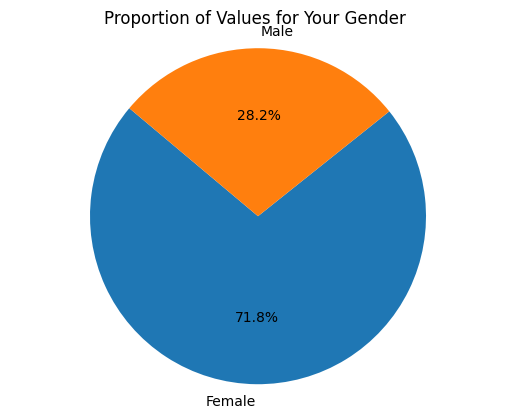

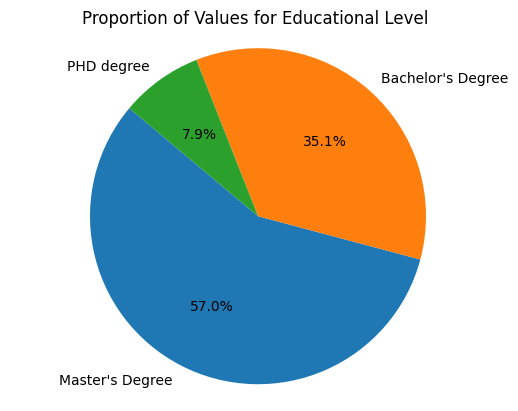

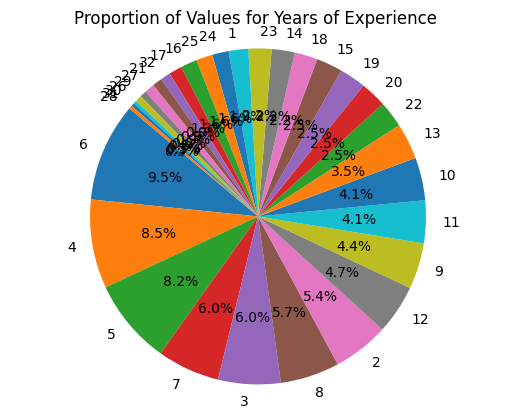

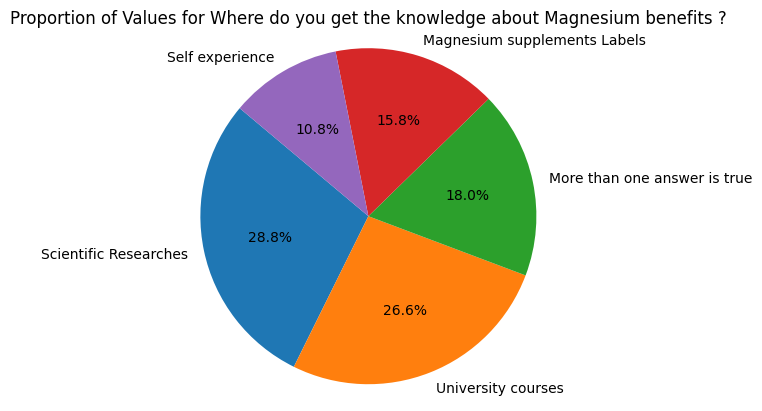

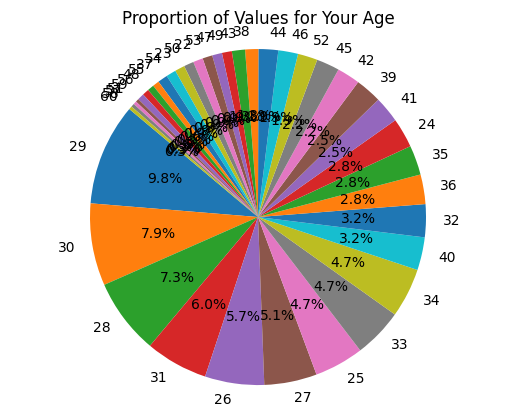

Error plotting pie chart for column 'What food is highest in magnesium ?_Whole grains': 'What food is highest in magnesium ?_Whole grains'
Error plotting pie chart for column 'What are the signs of low magnesium ?_All of above': 'What are the signs of low magnesium ?_All of above'
Error plotting pie chart for column 'What are the health condition does magnesium used for  ?_All of above': 'What are the health condition does magnesium used for  ?_All of above'
Error plotting pie chart for column 'Can magnesium maintained body biological clock balanced ?_True': 'Can magnesium maintained body biological clock balanced ?_True'
Error plotting pie chart for column 'Does magnesium help with anxiety ?_Yes': 'Does magnesium help with anxiety ?_Yes'
Error plotting pie chart for column 'What is the main health benefit for Magnesium L-threonate ?_Brain health': 'What is the main health benefit for Magnesium L-threonate ?_Brain health'
Error plotting pie chart for column 'To improve sleep and get ri

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [120]:
# Iterate over each column and plot a pie chart
for column in new_df.columns:
    try:
        plt.figure()
        counts = df[column].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Proportion of Values for {column}')
        plt.axis('equal')
        plt.show()
    except Exception as e:
        print(f"Error plotting pie chart for column '{column}': {e}")